<a href="https://colab.research.google.com/github/marcinwolter/MachineLearning-KISD-2025/blob/main/lecture5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>




#**<font color = "red">Introduction to machine learning</font>**

**Lecture 5**



##**<font color = "green">Data augmentation </font>**
##**<font color = "green">Transfer learning</font>**
##**<font color = "green">Cross-validation</font>**
##**<font color = "green">Hyper-parameter tuning</font>**


*2 April 2025*


---

*Marcin Wolter, IFJ PAN*

*e-mail: marcin.wolter@ifj.edu.pl*


---
</center>

#<font color='green'>**Program for today:**

* ###  <font color='red'>How much Deep Neaural Networks can improve physics analysis?

---

* ###  <font color='red'>Create more training data - data augmentation
* ###  <font color='red'>Use knowlegdge from previous trainings - knowlegde transfer by using pretrained networks  
* ###  <font color='red'>Cross-validation, k-folding - using all data for training
* ###  <font color='red'>Hyperparameter optimization


---





<br>


**As always all slides are here:**

*https://github.com/marcinwolter/MachineLearning-KISD-2025*

<br>






---



---



# <font color='green'> **How much DNN can improve High Energy Physics analysis?**

**A well known paper by P. Baldi, P.Sadowski and D. Whiteson**

https://www.nature.com/articles/ncomms5308.pdf

<center>


<img src = 'https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture5_2023/MachineLearning2018_56.png' width=650px>
<br>


<img src = 'https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture5_2023/MachineLearning2018_57.png' width=350px>
<br>


<img src = 'https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture5_2023/MachineLearning2018_58.png' width=450px>
<br>


<img src = 'https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture5_2023/MachineLearning2018_59.png' width=450px>
<br>

<img src = 'https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture5_2023/MachineLearning2018_510.png' width=450px>
<br>

<img src = 'https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture5_2023/MachineLearning2018_511.png' width=450px>
<br>

<img src = 'https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture5_2023/MachineLearning2018_512.png' width=450px>
<br>

<img src = 'https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture5_2023/MachineLearning2018_513.png' width=550px>
<br>



---


# <font color='red'> **Significantly better performance with Deep Learning!!!**

### **An iPython notebook**
"repeating" to some extend the analysis from the above article:

https://github.com/marcinwolter/MachineLearning-KISD-2025/blob/main/HIGGS.ipynb

The notebook reuires some resources - most probably it will not complete on the free google colab.



---



---



---




<center>

# <font color='green'> **Data augmentation**

#**How to improve the performance?**

From last week example we have learned, that the methods are:
* Train more networks in parallel and take an average as a clissifier,
* Artificially increase the size of the training dataset - <font color='red'> **create more images by the *augmentation* procedure.**


#**Data augmentation**
in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model.

###**Transformations of images**

Geometric transformations, flipping, color modification, cropping, rotation, noise injection and random erasing are used to augment image in deep learning.

###**Introducing new synthetic images**
If a dataset is very small, then a version augmented with rotation and mirroring etc. may still not be enough for a given problem. Another solution is the sourcing of entirely new, synthetic images through various techniques, for example the use of **generative adversarial networks** *(we will talk about them later)* to create new synthetic images for data augmentation.

<br>

*Shorten, Connor; Khoshgoftaar, Taghi M. (2019). "[A survey on Image Data Augmentation for Deep Learning](https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0197-0)". Mathematics and Computers in Simulation. springer. 6: 60. doi:10.1186/s40537-019-0197-0*

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture7/data_aug_basic.png' width=650px>

<br>

---

<br>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture7/1_kqKzGryy0qYjEXbR3kyNOg.png' width=650px>




---



---



---




# <font color='green'>**An example – pattern recognition**
# <font color='green'>**on CIFAR10 photos dataset**

**CIFAR10** small image classification. <br>Dataset of 50\,000 32x32 color training images\, labeled over 10 categories\, and 10\,000 test images\.</span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture7/MachineLearning2020_733.png' width=450px>



**Augmentation:**<br>
the network is trained with and without augmentation.

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture7/MachineLearning2020_734.png' width=450px>






# Modified version of:
https://github.com/moritzhambach/Image-Augmentation-in-Keras-CIFAR-10-/blob/master/CNN%20with%20Image%20Augmentation%20(CIFAR10).ipynb



### CNN with Image Augmentation (CIFAR10)
images of 10 categories: airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck. In RGB, 32x32 pixels.

**The state of the art accuracy is about 99 percent.**

We will reach about 90% accuracy \(with 10 classes of images\).


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras as k
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from keras.regularizers import l2
import h5py
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

### **Important:** we reduce number or training images taking 5 classes out of 10 and reducing the size of training dataset

This is done to make the training faster. You can try training un the full dataset.

170498071/170498071 [==============================] - 3s 0us/step


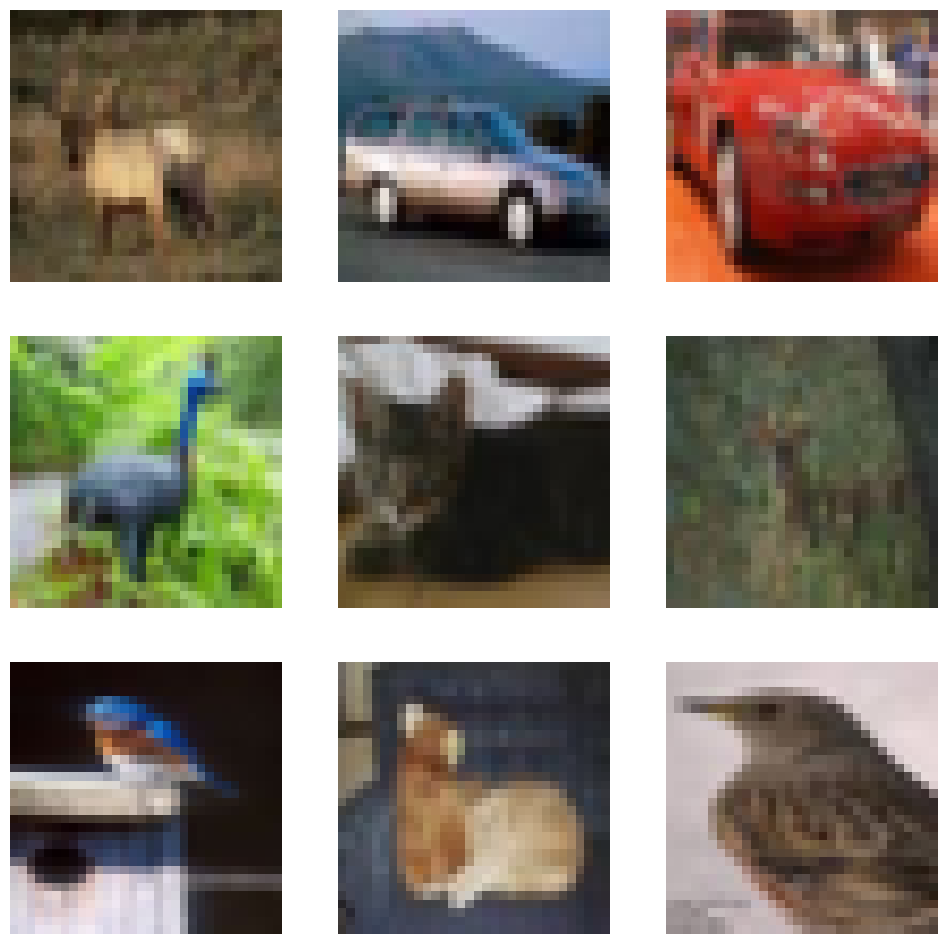

In [ ]:
 # labels
num_classes=5

#load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_rows, img_cols , channels = 32,32,3

# REDUCE THE SIZE OF TRAINING SAMPLE TO 30 000 events
x_train = x_train[0:30000]
y_train = y_train[0:30000]

# take some labels only
x_train = x_train[np.where(y_train.reshape(-1)<num_classes)]
y_train = y_train[np.where(y_train.reshape(-1)<num_classes)]
x_test = x_test[np.where(y_test.reshape(-1)<num_classes)]
y_test = y_test[np.where(y_test.reshape(-1)<num_classes)]

# save x_test images
xx_test = x_test
yy_test = y_test

fig = plt.figure(figsize=(12, 12))
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.axis('off')
    plt.imshow(x_train[i])
plt.show()

In [ ]:
#reshape into images
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
input_shape = (img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (15020, 32, 32, 3)
15020 train samples
5000 test samples


In [ ]:
#convert integers to float; normalise and center the mean
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
mean=np.mean(x_train)
std=np.std(x_train)
x_test=(x_test-mean)/std
x_train=(x_train-mean)/std

In [ ]:

print(y_train.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)

(15020, 1)
(15020, 5)


In [ ]:
# build and compile the model


reg=None
num_filters=32
ac='relu'
adm=tf.keras.optimizers.legacy.Adam(learning_rate=0.001, decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm
drop_dense=0.5
drop_conv=0.1

model = Sequential()

model.add(Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg, input_shape=(img_rows, img_cols, channels),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model.add(Dropout(drop_conv))

model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model.add(Dropout(drop_conv))

model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(512, activation=ac,kernel_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

#**Training without augmentation**

In [ ]:

# training without augmentation
history=model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
118/118 [==============================] - 18s 39ms/step - loss: 1.2379 - accuracy: 0.5692 - val_loss: 1.8895 - val_accuracy: 0.2990
Epoch 2/100
118/118 [==============================] - 2s 20ms/step - loss: 0.8065 - accuracy: 0.6931 - val_loss: 1.6975 - val_accuracy: 0.4390
Epoch 3/100
118/118 [==============================] - 2s 18ms/step - loss: 0.6606 - accuracy: 0.7485 - val_loss: 1.2130 - val_accuracy: 0.5834
Epoch 4/100
118/118 [==============================] - 2s 19ms/step - loss: 0.5667 - accuracy: 0.7868 - val_loss: 0.6790 - val_accuracy: 0.7434
Epoch 5/100
118/118 [==============================] - 3s 22ms/step - loss: 0.4932 - accuracy: 0.8147 - val_loss: 0.6009 - val_accuracy: 0.7766
Epoch 6/100
118/118 [==============================] - 2s 13ms/step - loss: 0.4323 - accuracy: 0.8378 - val_loss: 0.5929 - val_accuracy: 0.7788
Epoch 7/100
118/118 [==============================] - 1s 12ms/step - loss: 0.3839 - accuracy: 0.8584 - val_loss: 0.5963 - val_accuracy

In [ ]:
#training and test accuracy without dropout
train_acc=model.evaluate(x_train,y_train,batch_size=128)
train_acc

test_acc=model.evaluate(x_test,y_test,batch_size=128)
test_acc

print("Training accuracy: ", train_acc[1])
print("Testing accuracy: ", test_acc[1])

40/40 [==============================] - 0s 4ms/step - loss: 0.9461 - accuracy: 0.8444
Training accuracy:  0.9996005296707153
Testing accuracy:  0.8443999886512756


In [ ]:
# plotting helper function
def plothist(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

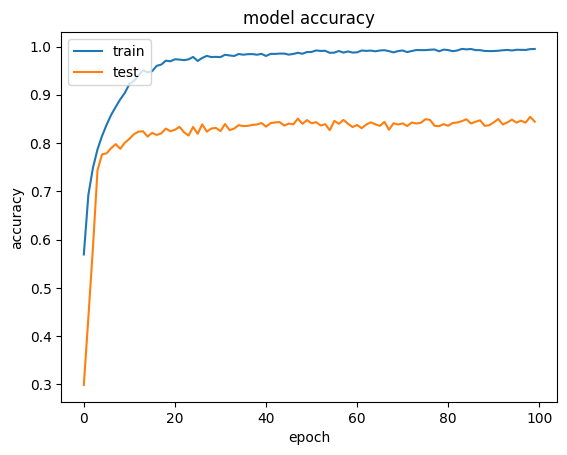

In [ ]:
plothist(history)

In [ ]:
#model.save('cifar10_01.h5')
#model=load_model('cifar10_01.h5')

#**Build bigger network, train with augmentation!**

# **Here comes the augmentation**

In [ ]:
# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.25
    )
datagen.fit(x_train)

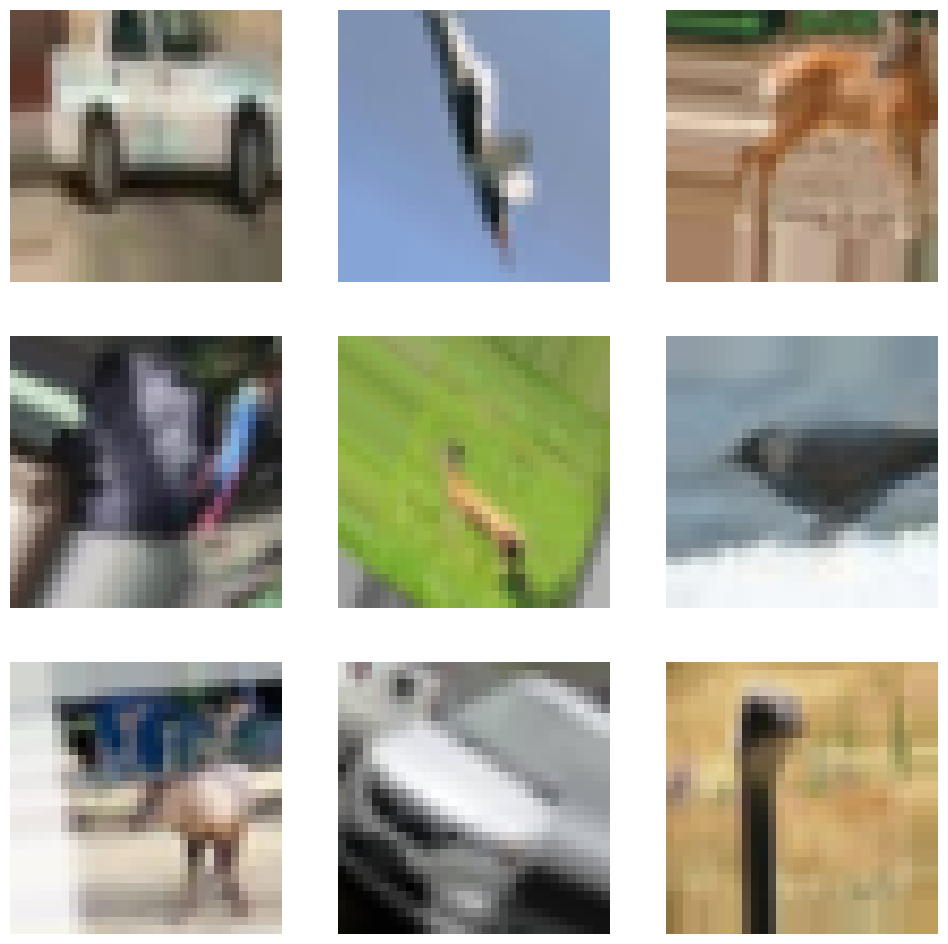

In [ ]:
# see example augmentation images
fig = plt.figure(figsize=(12, 12))
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    for i in range(0, 9):
         plt.subplot(330 + 1 + i)
         plt.imshow((X_batch[i]*std+mean).astype(np.uint8))    # again convert beack to integers
         plt.axis('off')
    plt.show()
    break



Augmentation of a single image

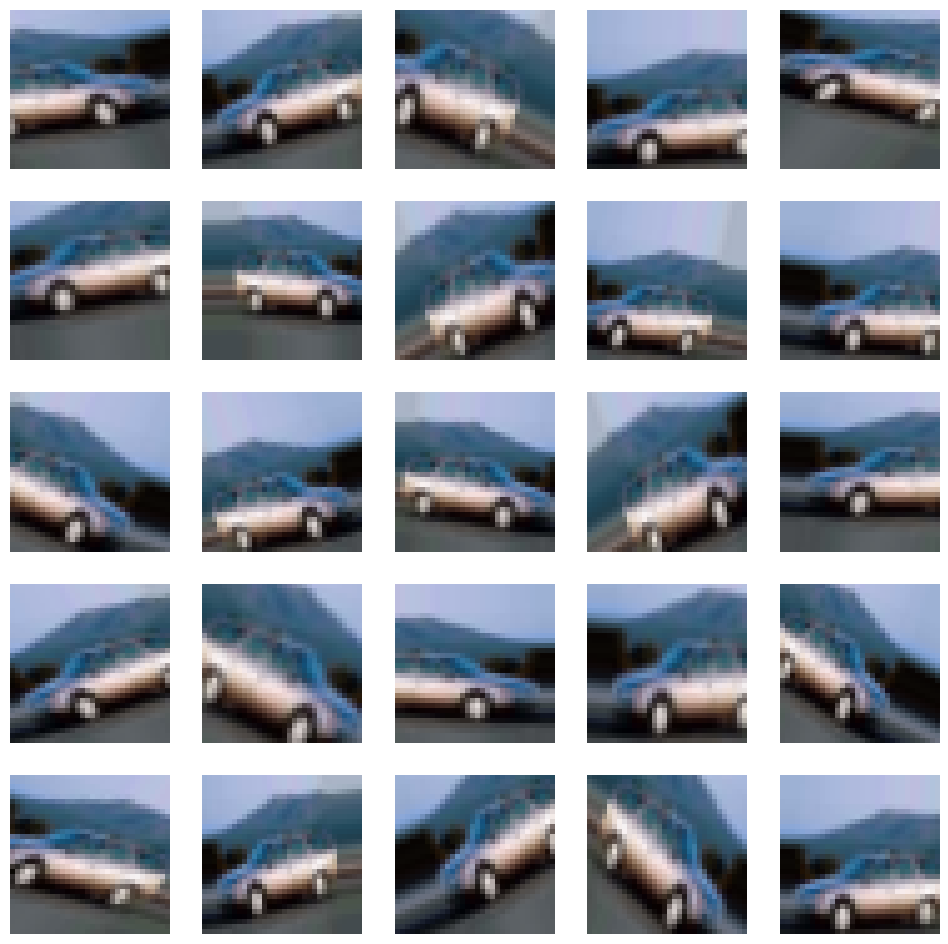

In [ ]:
# see example augmentation images
fig = plt.figure(figsize=(12, 12))

for i in range(0, 25):
    for X_batch, y_batch in datagen.flow(x_train[1:3], y_train[1:3], batch_size=1, shuffle=False):
         plt.subplot(5,5,i+1)
         plt.imshow((X_batch[0]*std+mean).astype(np.uint8))
         plt.axis('off')
         break

plt.show()



In [ ]:
# build again, same model as model1

#reg=l2(1e-4)   # L2 or "ridge" regularisation
reg2=None
num_filters2=32
ac2='relu'
adm2=tf.keras.optimizers.legacy.Adam(learning_rate=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt2=adm2
drop_dense2=0.5
drop_conv2=0.1

model2 = Sequential()

model2.add(Conv2D(num_filters2, (3, 3), activation=ac2, kernel_regularizer=reg2, input_shape=(img_rows, img_cols, channels),padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model2.add(Dropout(drop_conv2))

model2.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model2.add(Dropout(drop_conv2))

model2.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model2.add(Dropout(drop_conv2))

model2.add(Flatten())
model2.add(Dense(512, activation=ac2,kernel_regularizer=reg2))
model2.add(BatchNormalization())
model2.add(Dropout(drop_dense2))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt2)

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

#**Training with augmentation (using *datagen.flow*)**

In [ ]:
# train with image augmentation
history2=model2.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch = len(x_train) / 128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100


<ipython-input-18-a20bc8097490>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2=model2.fit_generator(datagen.flow(x_train, y_train, batch_size=128),


117/117 [==============================] - 11s 82ms/step - loss: 1.5336 - accuracy: 0.4777 - val_loss: 2.8622 - val_accuracy: 0.2064
Epoch 2/100
117/117 [==============================] - 10s 82ms/step - loss: 1.1409 - accuracy: 0.5573 - val_loss: 2.4313 - val_accuracy: 0.3252
Epoch 3/100
117/117 [==============================] - 10s 82ms/step - loss: 1.0058 - accuracy: 0.6069 - val_loss: 1.1933 - val_accuracy: 0.5262
Epoch 4/100
117/117 [==============================] - 10s 84ms/step - loss: 0.9498 - accuracy: 0.6279 - val_loss: 0.7647 - val_accuracy: 0.7010
Epoch 5/100
117/117 [==============================] - 11s 95ms/step - loss: 0.9024 - accuracy: 0.6479 - val_loss: 0.8026 - val_accuracy: 0.6904
Epoch 6/100
117/117 [==============================] - 9s 76ms/step - loss: 0.8503 - accuracy: 0.6700 - val_loss: 0.8521 - val_accuracy: 0.6874
Epoch 7/100
117/117 [==============================] - 10s 84ms/step - loss: 0.8105 - accuracy: 0.6826 - val_loss: 0.7145 - val_accuracy: 0.733

In [ ]:
#model2.save('cifar10_02.h5')         # about 90% accuracy

In [ ]:
#training and test accuracy without dropout
train_acc=model2.evaluate(x_train,y_train,batch_size=128)
train_acc

test_acc=model2.evaluate(x_test,y_test,batch_size=128)
test_acc

print("Training accuracy: ", train_acc[1])
print("Testing accuracy: ", test_acc[1])

40/40 [==============================] - 0s 4ms/step - loss: 0.3158 - accuracy: 0.9020
Training accuracy:  0.9601198434829712
Testing accuracy:  0.9020000100135803


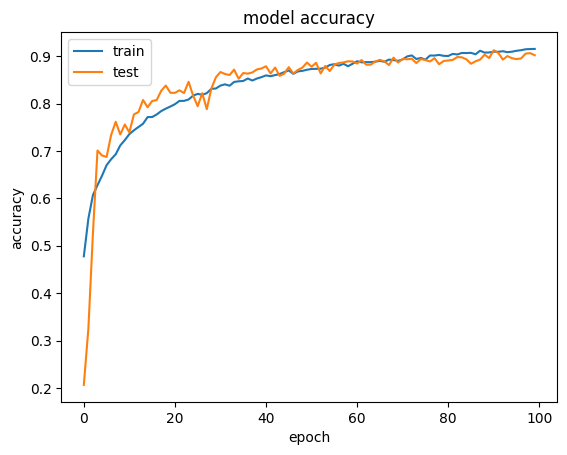

In [ ]:
plothist(history2)  # 128 batch, 0.001 lr,

# **Plot images**

157/157 [==============================] - 0s 2ms/step


<ipython-input-22-462233b6759a>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(0, -2, class_names[int(yy_test[i_img])]+" "+class_names[y_pred[i_img]], color='red', fontsize=12)
<ipython-input-22-462233b6759a>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(0, -2, class_names[int(yy_test[i_img])], color='green', fontsize=12)


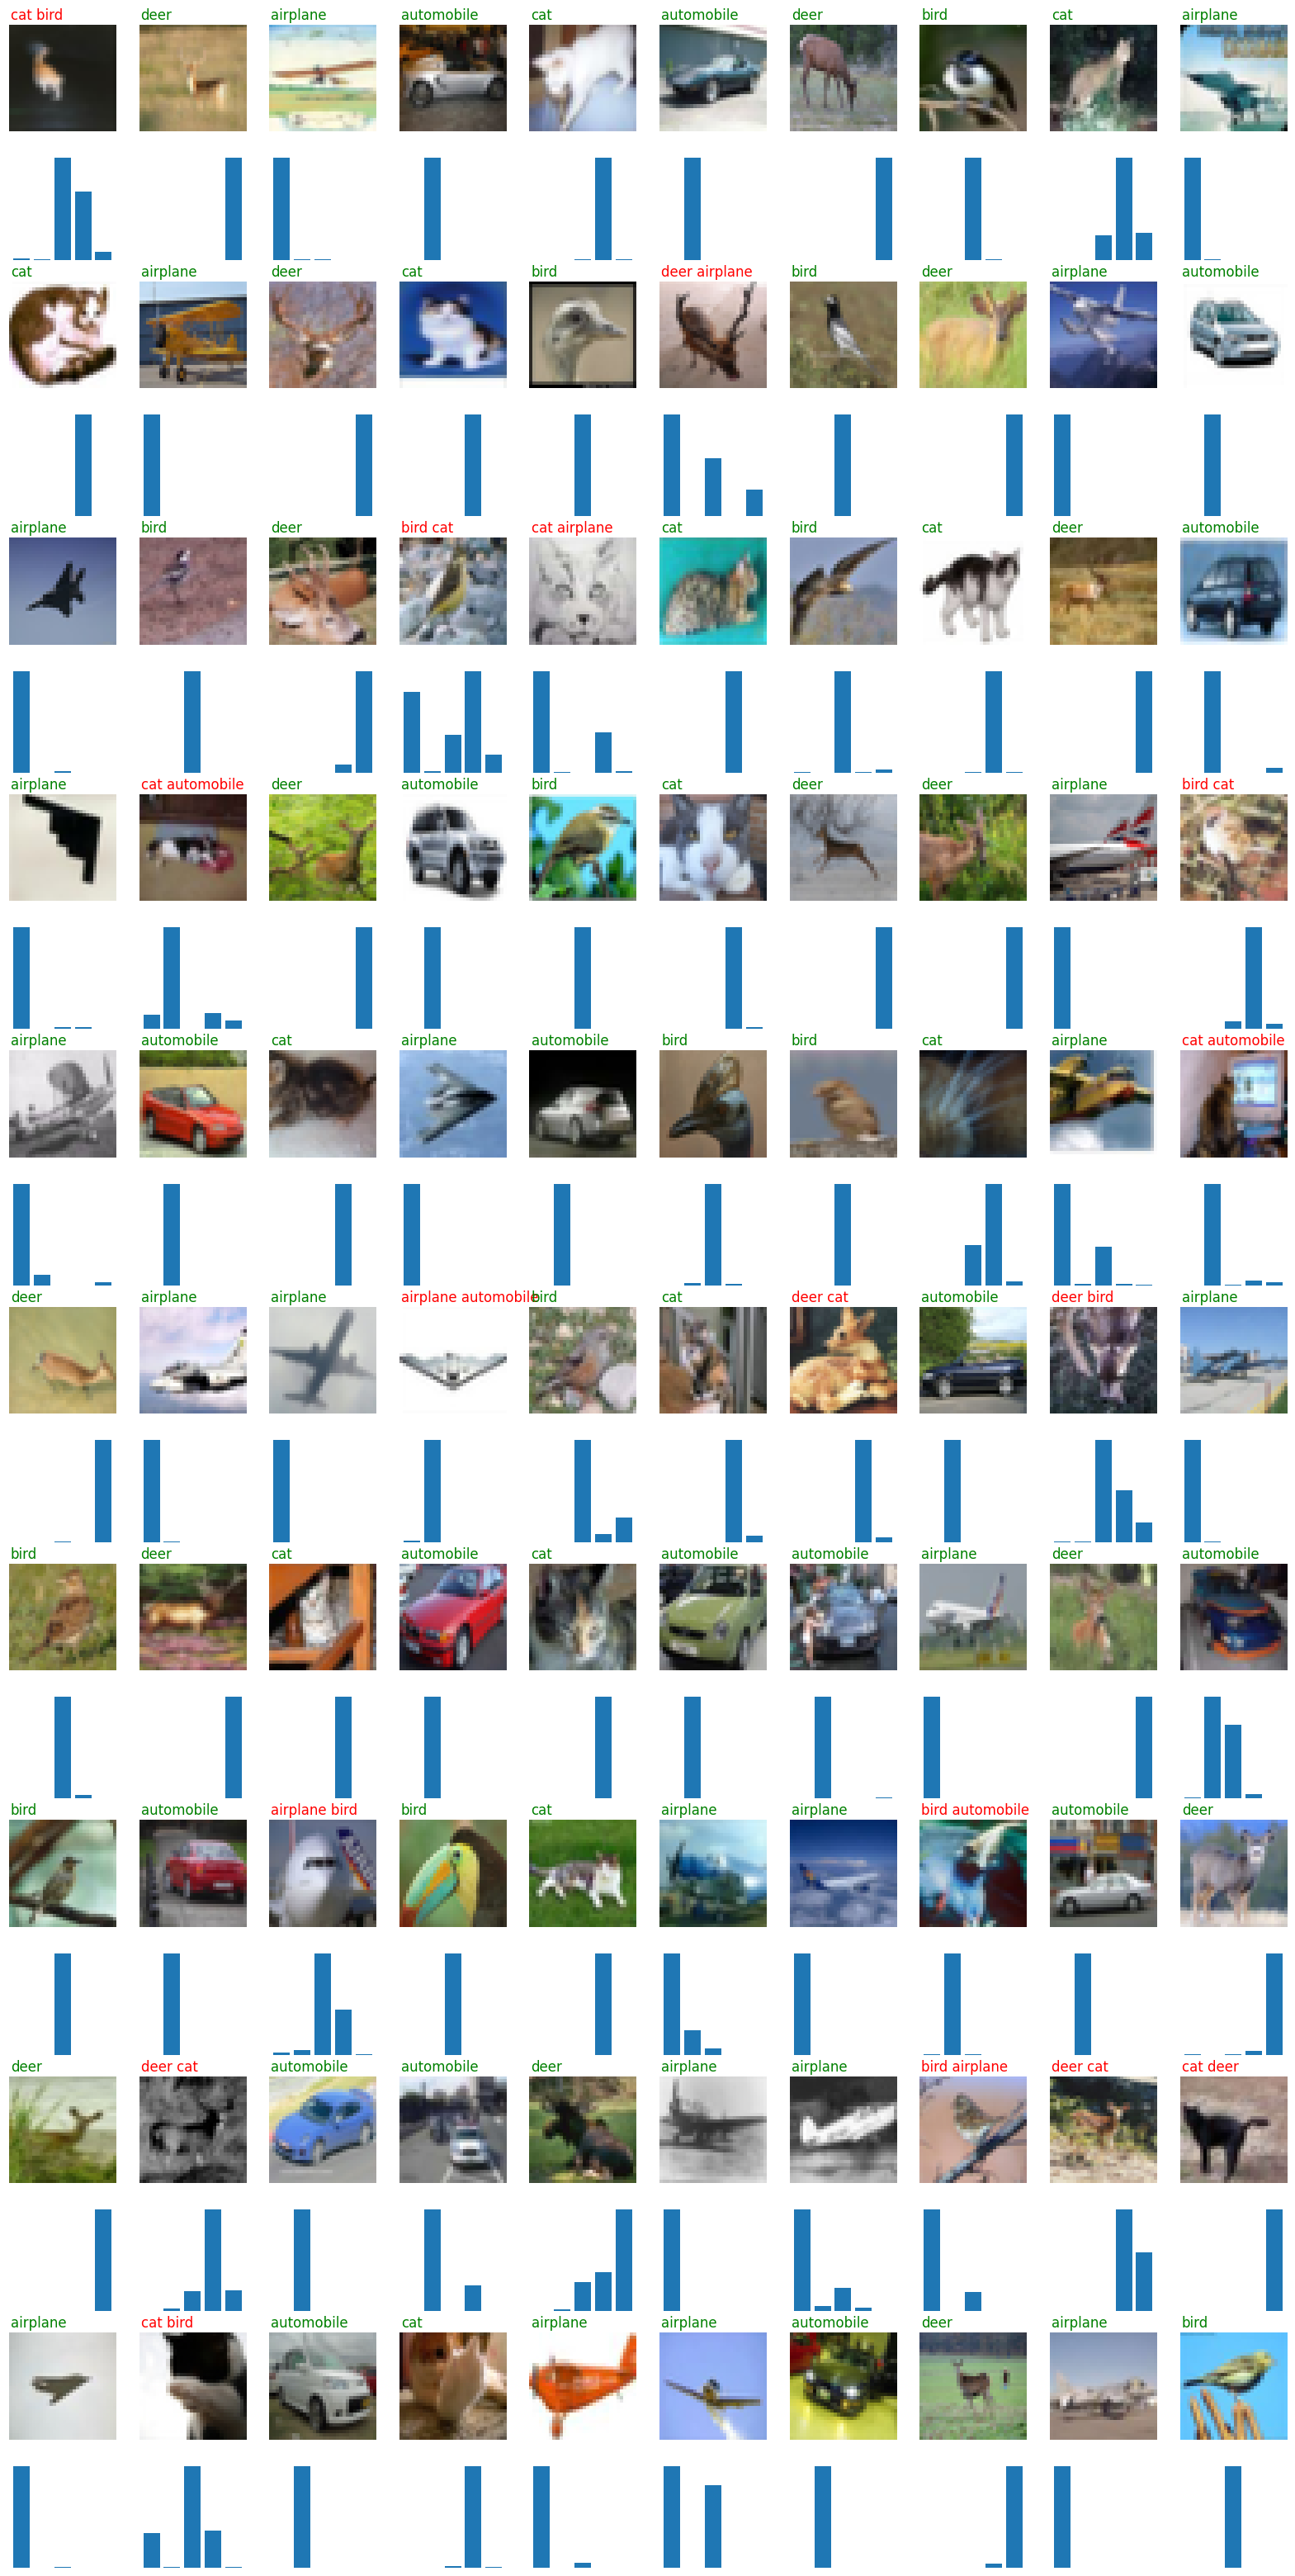

In [ ]:
# Names of predicted classes (randomly chosen images)

import random


class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# this construction returns the most probable class for each event
y_pred = np.argmax(model2.predict(x_test), axis = 1)
y_pred_prob = model2.predict(x_test)

grid_w = 10
grid_h = 10

fig = plt.figure(figsize=(20, 40))
for i in range(0,grid_w*grid_h):
    i_pos = 2*(int(i/grid_w))*grid_w+ i%grid_w + 1
    plt.subplot(2*grid_h, grid_w, i_pos)
    i_img = random.randint(0,len(xx_test))
    plt.imshow(xx_test[i_img])
    plt.axis('off')
    if yy_test[i_img] == y_pred[i_img]:
      plt.text(0, -2, class_names[int(yy_test[i_img])], color='green', fontsize=12)
    else:
      plt.text(0, -2, class_names[int(yy_test[i_img])]+" "+class_names[y_pred[i_img]], color='red', fontsize=12)
    plt.subplot(2*grid_h, grid_w, i_pos + grid_w)
    plt.bar(range(num_classes),y_pred_prob[i_img])
    plt.axis('off')

plt.show()

In [ ]:
# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model2.predict(x_test, verbose=2)

y_pred = np.argmax(Y_pred, axis=1)

#confusion matrix
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)



157/157 - 0s - 360ms/epoch - 2ms/step
[[894  50  20  18  18]
 [  1 997   0   1   1]
 [ 34  14 807  95  50]
 [  9  25  22 904  40]
 [  6   3  23  60 908]]




---



---



---



# <font color='green'> **Transfer learning**

The reuse of a previously learned model on a new problem is known as transfer learning. It’s particularly popular in deep learning right now since it can train deep neural networks with a small amount of data.

<img src = 'https://editor.analyticsvidhya.com/uploads/444861_2vse-G3FKMT2D59NFWduMA.jpg' width=450px>

The knowledge of an already trained machine learning model is transferred to a different but closely linked problem throughout transfer learning. For example, if you trained a simple classifier to predict whether an image contains a backpack, you could use the model’s training knowledge to identify other objects such as sunglasses.



# **What is Transfer Learning?**
With transfer learning, we basically try to use what we’ve learned in one task to better understand the concepts in another. Weights are being automatically being shifted to a network performing “task A” from a network that performed new “task B.”


<img src = 'https://editor.analyticsvidhya.com/uploads/751191_rsgubd7aTgUdY65KPYATBA.png' width=450px>

So a network trained to recognize a "cat" can be reused to recognize a "dog".


<img src = 'https://editor.analyticsvidhya.com/uploads/499849315476_1592890541_transfer.jpg' width=500px>

Because the model has trained to recognise objects in the earlier levels, we will simply retrain the subsequent layers to understand what distinguishes sunglasses from other objects.

**Option is to employ a model that has already been trained. There are a number of these models out there, so do some research beforehand. The number of layers to reuse and retrain is determined by the task.**

Keras consists of many pre-trained models used in transfer learning, prediction, fine-tuning.


# <font color='green'>**An example – pattern recognition**
# <font color='green'>**on CIFAR10 photos dataset**

**CIFAR10** small image classification. <br>Dataset of 50\,000 32x32 color training images\, labeled over 10 categories\, and 10\,000 test images\.</span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture7/MachineLearning2020_733.png' width=450px>


###<font color = 'red'> **We have done it already for CIPHAR10, now we reduce the size of dataset even further**




# Modified version of:
https://github.com/moritzhambach/Image-Augmentation-in-Keras-CIFAR-10-/blob/master/CNN%20with%20Image%20Augmentation%20(CIFAR10).ipynb



In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras as k
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from keras.regularizers import l2
import h5py
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

### **Important:** we reduce the size of he training dataset to 10 000 images.

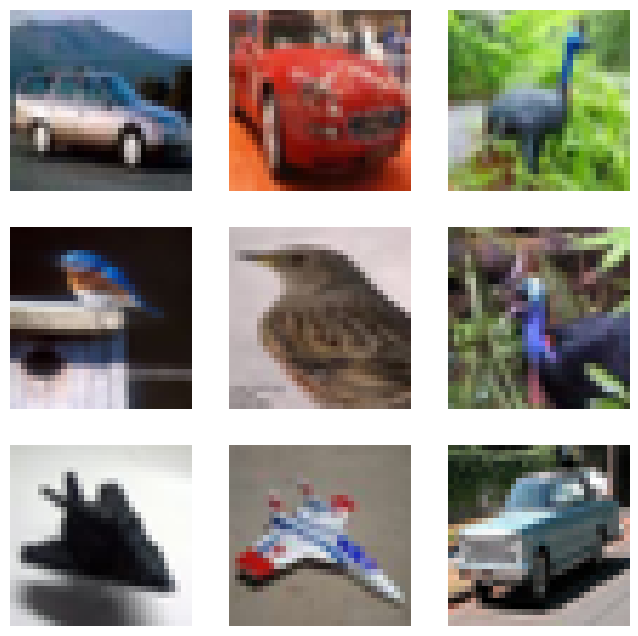

In [ ]:
 # labels
num_classes=3

#load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_rows, img_cols , channels = 32,32,3

# REDUCE THE SIZE OF TRAINING SAMPLE TO 10 000 events
x_train = x_train[0:10000]
y_train = y_train[0:10000]

# take some labels only
x_train = x_train[np.where(y_train.reshape(-1)<num_classes)]
y_train = y_train[np.where(y_train.reshape(-1)<num_classes)]
x_test = x_test[np.where(y_test.reshape(-1)<num_classes)]
y_test = y_test[np.where(y_test.reshape(-1)<num_classes)]


# save x_test images
xx_test = x_test
yy_test = y_test

fig = plt.figure(figsize=(8, 8))
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.axis('off')
    plt.imshow(x_train[i])
plt.show()

In [ ]:
#reshape into images
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
input_shape = (img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (3011, 32, 32, 3)
3011 train samples
3000 test samples


In [ ]:
#convert integers to float; normalise and center the mean
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
mean=np.mean(x_train)
std=np.std(x_train)
x_test=(x_test-mean)/std
x_train=(x_train-mean)/std

In [ ]:

print(y_train.shape)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)

(3011, 1)
(3011, 3)


# Data augmentation

In [ ]:
# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.25
    )
datagen.fit(x_train)

In [ ]:
# build and compile the model  (roughly following the VGG paper)

#reg=l2(1e-4)   # L2 or "ridge" regularisation
reg=None
num_filters=16 #32
ac='relu'
adm=tf.keras.optimizers.legacy.Adam(learning_rate=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm
drop_dense=0.5
drop_conv=0



## **Regular convolutional network with augmentation**


In [ ]:

model = Sequential()

model.add(Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg, input_shape=(img_rows, img_cols, channels),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model.add(Dropout(drop_conv))

model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model.add(Dropout(drop_conv))

model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(512, activation=ac,kernel_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_14 (Ba  (None, 32, 32, 16)        64        
 tchNormalization)                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization_15 (Ba  (None, 32, 32, 16)        64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                      

#**Training with augmentation**

Very short training

In [ ]:


# train with image augmentation   steps_per_epoch = len(x_train) / 128,
history=model.fit(datagen.flow(x_train, y_train, batch_size=128),
                     epochs=30, validation_data=(x_test, y_test))


Epoch 1/30
24/24 [==============================] - 5s 146ms/step - loss: 1.2260 - accuracy: 0.6074 - val_loss: 1.2655 - val_accuracy: 0.3333
Epoch 2/30
24/24 [==============================] - 2s 81ms/step - loss: 0.9070 - accuracy: 0.6822 - val_loss: 1.4349 - val_accuracy: 0.3740
Epoch 3/30
24/24 [==============================] - 2s 82ms/step - loss: 0.7174 - accuracy: 0.7204 - val_loss: 1.6797 - val_accuracy: 0.4047
Epoch 4/30
24/24 [==============================] - 2s 84ms/step - loss: 0.7015 - accuracy: 0.7333 - val_loss: 1.8537 - val_accuracy: 0.4917
Epoch 5/30
24/24 [==============================] - 2s 80ms/step - loss: 0.6544 - accuracy: 0.7463 - val_loss: 2.2616 - val_accuracy: 0.3380
Epoch 6/30
24/24 [==============================] - 2s 89ms/step - loss: 0.6044 - accuracy: 0.7609 - val_loss: 2.3313 - val_accuracy: 0.3340
Epoch 7/30
24/24 [==============================] - 2s 95ms/step - loss: 0.5967 - accuracy: 0.7599 - val_loss: 2.4504 - val_accuracy: 0.5053
Epoch 8/30
2

In [ ]:
#training accuracy
train_acc=model.evaluate(x_train,y_train,batch_size=128)
train_acc
test_acc=model.evaluate(x_test,y_test,batch_size=128)
test_acc

print("Training and test accuracies: ", train_acc[1], test_acc[1])

24/24 [==============================] - 0s 10ms/step - loss: 0.5377 - accuracy: 0.8067
Training and test accuracies:  0.8346064686775208 0.8066666722297668


In [ ]:
# plotting helper function
def plothist(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

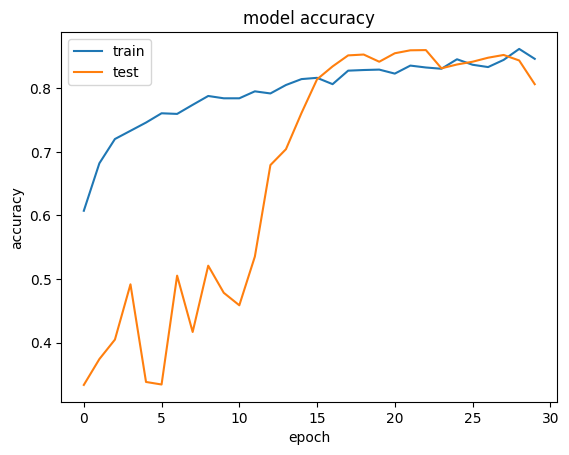

In [ ]:
plothist(history)

## **Pretrained network Xception**

The pretrained Xception network is taken from:

https://keras.io/api/applications/

We train the dense layers only!!!

In [ ]:

base_model = k.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(128, 128 , channels),
    include_top=False)  # Do not include the ImageNet classifier at the top.

# Freeze base model
base_model.trainable = False

# Create new model on top.
inputs = k.Input(shape=(32, 32, 3))
# upsampling to get 32x32 -> 128x128
upsamp1 = tf.keras.layers.UpSampling2D((2,2))(inputs)
upsamp2 = tf.keras.layers.UpSampling2D((2,2))(upsamp1)
x = base_model(upsamp2, training=False)

# Dense layers to be trained
x = k.layers.Flatten()(x)
x = k.layers.Dense(128, activation=ac,kernel_regularizer=reg)(x)
x = k.layers.BatchNormalization()(x)
x = k.layers.Dropout(drop_dense)(x)
outputs = k.layers.Dense(num_classes, activation='softmax')(x)

model = k.Model(inputs, outputs)

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)


83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 up_sampling2d (UpSampling2  (None, 64, 64, 3)         0         
 D)                                                              
                                                                 
 up_sampling2d_1 (UpSamplin  (None, 128, 128, 3)       0         
 g2D)                                                            
                                                                 
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 flatten_3 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               419443

#**Training with augmentation**

Very short training

In [ ]:

# training without augmentation
#history=model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

# train with image augmentation   steps_per_epoch = len(x_train) / 128,
history=model.fit(datagen.flow(x_train, y_train, batch_size=128),
                     epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
24/24 [==============================] - 11s 261ms/step - loss: 0.6768 - accuracy: 0.7629 - val_loss: 0.3621 - val_accuracy: 0.8980
Epoch 2/30
24/24 [==============================] - 4s 176ms/step - loss: 0.4877 - accuracy: 0.8080 - val_loss: 0.2815 - val_accuracy: 0.9020
Epoch 3/30
24/24 [==============================] - 4s 157ms/step - loss: 0.4419 - accuracy: 0.8240 - val_loss: 0.2399 - val_accuracy: 0.9157
Epoch 4/30
24/24 [==============================] - 5s 198ms/step - loss: 0.4303 - accuracy: 0.8333 - val_loss: 0.2314 - val_accuracy: 0.9123
Epoch 5/30
24/24 [==============================] - 5s 224ms/step - loss: 0.4163 - accuracy: 0.8512 - val_loss: 0.2133 - val_accuracy: 0.9207
Epoch 6/30
24/24 [==============================] - 4s 155ms/step - loss: 0.4042 - accuracy: 0.8496 - val_loss: 0.2160 - val_accuracy: 0.9187
Epoch 7/30
24/24 [==============================] - 4s 158ms/step - loss: 0.4061 - accuracy: 0.8389 - val_loss: 0.2194 - val_accuracy: 0.9190
Epoch

In [ ]:
#training accuracy
train_acc=model.evaluate(x_train,y_train,batch_size=128)
train_acc
test_acc=model.evaluate(x_test,y_test,batch_size=128)
test_acc

print("Training and test accuracies: ", train_acc[1], test_acc[1])

24/24 [==============================] - 2s 80ms/step - loss: 0.1840 - accuracy: 0.9350
Training and test accuracies:  0.9498505592346191 0.9350000023841858


In [ ]:
# plotting helper function
def plothist(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

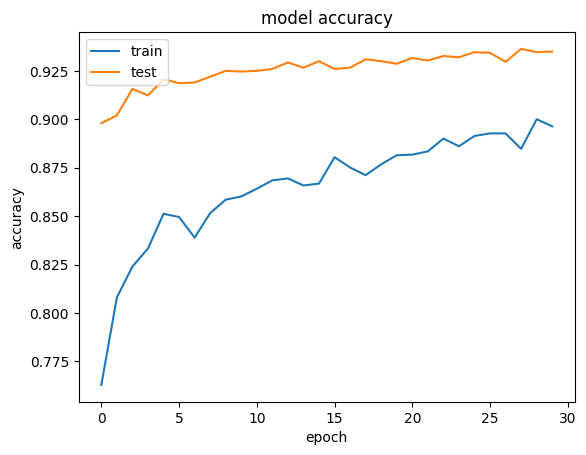

In [ ]:
plothist(history)

##<font color = 'red'> **Transfer learning significantly improves our results!**

#<font color='green'>**Summary**

##**So\, we know how to recognize what is on images\!**

#<font color='red'>**Exercise**

* Build your own convolutional neural network to recognize elements from the "Fashion MNIST" dataset: https://keras.io/api/datasets/fashion_mnist/
* Implement **augmentation** in this code or **transfer learning**.
* A volunteer can present his code.

# **Think about your classification tasks!!!**

Might be a piece of your current analysis!



---



---



---



<center>

# <font color='green'> **Cross-validation - using all data for training**

<span style="color:#000000"> __Overtraining__ </span>  <span style="color:#000000"> – algorithm “learns” the particular events\, not the rules\.</span>

<span style="color:#800000"> _This effect appears for all ML algorithms\._ </span>

<span style="color:#000000">Remedy – checking with another\, independent dataset\.</span>




<span style="color:#800000"> __How to train a ML algorithm?__ </span>

* <span style="color:#000000">How to avoid </span>  <span style="color:#000000"> __overtraining__ </span>  <span style="color:#000000"> while learning?</span>

* <span style="color:#000000">We should use one sample for </span>  <span style="color:#000000"> __training__ </span>  <span style="color:#000000"> and another for </span>  <span style="color:#000000"> __validating__ </span>  

* <span style="color:#000000">Then we increase the error – we use just a part of data for training\.</span>

<span style="color:#C9211E"> __Important remark:__ </span>  <span style="color:#000000"> to avoid ovetraining and find the performance of the trained algorithm we should use one more\, </span>  <span style="color:#C9211E"> __third data sample__ </span>  <span style="color:#000000"> to measure the final performance of the ML algorithm\.</span>



<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_85.png' width=450px>




---



---




#<span style="color:#800000"> __Cross\-validation__ </span>

<span style="color:#000000">We have independant training sample $L_n$ and a test sample $T_m$. </span>

<span style="color:#000000">Error level of the classifier                          built on the training sample $L_n$:

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_818.png' width=200px>

**"Standard" procedure:**

* <span style="color:#000000">Estimator using "recycled data" \(the same data for training and for error calculation\) is biased\.</span>

* <span style="color:#000000">Reduction of bias: division of data into two parts \(training & validation\)\. But than we use just a half of information only\.</span>

**Cross\-validation:**

– out of sample $L_n$ we remove just one event $j$, than train classifier\, validate on single event $j$\.


<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_819.png' width=250px>

We repeat $n$ times and get the estimator \(an average of all n estimators\): </span>


<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_820.png' width=250px>

<span style="color:#000000">We get an estimator\, which is unbiased \(in the limit of huge $n$\)\,**but training is CPU demanding**\. </span>




#**Cross\-validation**

<span style="color:#000000">Intermediate solution –</span>   <span style="color:#000000"> **_k\-fold cross\-validation_** </span>

<span style="color:#000000">The sample is divided into $k$ subsamples\, $k-1$ of them we use for training\, the one for validation\. Then the procedure is repeated with other subsamples and the procedure is repeated k times\. </span>

<span style="color:#000000">Smaller CPU usage comparing to the full cross\-validation\.</span>

<span style="color:#000000">Recommended $k \approx 10$ \.</span>

<span style="color:#000000">Resulting classifier might be in the simplest case an average of all k classifiers \(or they might be joined together in another way\) \.</span>







#<span style="color:#800000"> __Model performance__ </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_824.png' width=650px>



#__Train vs Test vs Valid__ </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_825.png' width=650px>


Source: <span style="color:#000000">[https://www\.slideshare\.net/0xdata/top\-10\-data\-science\-practitioner\-pitfalls](https://www.slideshare.net/0xdata/top-10-data-science-practitioner-pitfalls)</span>


# **Cross-validation example**
# **Hand-written digits classification with k-folding**

In [ ]:
'''Trains a simple deep NN on the MNIST dataset.

Gets to 99.6% test accuracy after 40 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.optimizers import RMSprop, Adam, Adadelta
from keras.callbacks import EarlyStopping

#from keras.utils import plot_model
from IPython.display import Image

from sklearn.model_selection import KFold

batch_size = 128
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train0), (x_test, y_test0) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)



x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train0, num_classes)
y_test = keras.utils.to_categorical(y_test0, num_classes)



60000 train samples
10000 test samples


# **Reduce the dataset size**

so we see the performance deterioration.

In [ ]:
N_TRAIN_EXAMPLES = 30000 #9000
N_TEST_EXAMPLES = 10000

x_train = x_train[:N_TRAIN_EXAMPLES]
x_test = x_test[:N_TEST_EXAMPLES]
y_train = y_train[:N_TRAIN_EXAMPLES]
y_test = y_test[:N_TEST_EXAMPLES]

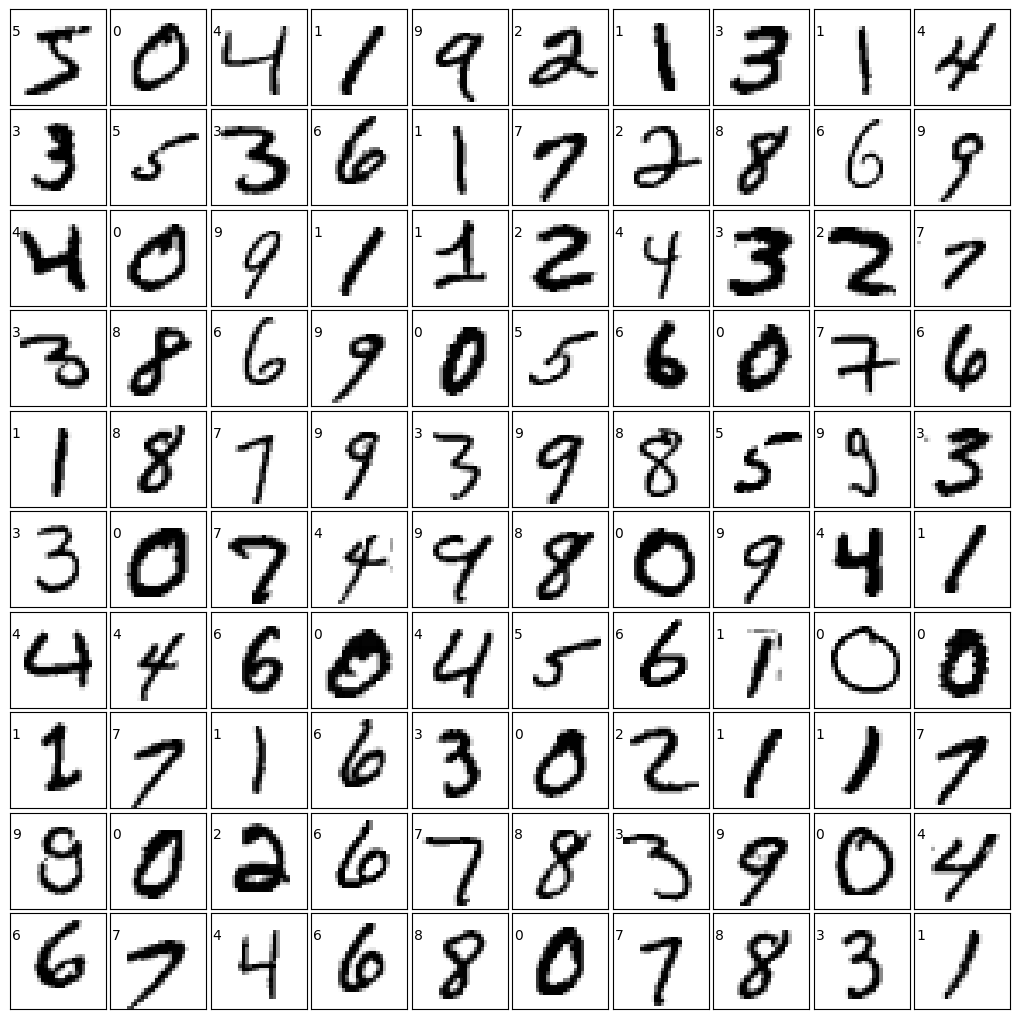

In [ ]:
#visualize the digits

fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape(img_rows, img_cols), cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y_train0[i]))

In [ ]:
def define_model():
# Our old fully connected (dense) network
#model = Sequential()
#model.add(Dense(512, activation='relu', input_shape=(784,)))
#model.add(Dropout(0.2))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(num_classes, activation='softmax'))

  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))



  #model.summary()

  return model

In [ ]:
def plotModel(model):
  plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
  Image('model_plot.png')

### Here we introduce "early stopping"

In [ ]:
def fit_model(model, x_train, y_train, x_val, y_val):
  model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

  es = EarlyStopping(
    monitor="val_loss",
    patience=3,
    verbose=0
  )

  history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val),
                    callbacks=[es])
  return history, model

# **Train with k-folding**
**Here the KFold() function from scikit-learn is used**

In [ ]:

# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):

  # prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  # enumerate splits
  for train_ix, test_ix in kfold.split(dataX):
    # define model
    model = define_model()
    # select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
    # fit model
    history, model = fit_model(model, trainX, trainY, testX, testY)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
		# stores scores
    scores.append(acc)
    histories.append(history)
    models.append(model)
  return scores, histories, models

# **Make plots**

In [ ]:

# plot diagnostic learning curves
def summarize_diagnostics(histories):
  plt.figure(figsize=(10,10))
  for i in range(len(histories)):
		# plot loss
    plt.subplot(2, 1, 1)
    plt.title('Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
    plt.ylim(0,0.1)
    plt.legend(['loss','val_loss'])
    # plot accuracy
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.ylim(0.9,1)
    plt.legend(['accuracy','val_accuracy'])
  plt.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
	# box and whisker plots of results
  plt.figure(figsize=(10,10))
  plt.boxplot(scores)
  plt.show()

# **Perform training**

In [ ]:
	scores, histories, models = list(), list(), list()

  # evaluate model
	scores, histories, models = evaluate_model(x_train, y_train, n_folds=10)


Epoch 1/20
211/211 [==============================] - 15s 18ms/step - loss: 0.4942 - accuracy: 0.8370 - val_loss: 0.0794 - val_accuracy: 0.9727
Epoch 2/20
211/211 [==============================] - 3s 13ms/step - loss: 0.1342 - accuracy: 0.9604 - val_loss: 0.0567 - val_accuracy: 0.9793
Epoch 3/20
211/211 [==============================] - 2s 11ms/step - loss: 0.0958 - accuracy: 0.9717 - val_loss: 0.0374 - val_accuracy: 0.9867
Epoch 4/20
211/211 [==============================] - 2s 8ms/step - loss: 0.0727 - accuracy: 0.9782 - val_loss: 0.0317 - val_accuracy: 0.9893
Epoch 5/20
211/211 [==============================] - 1s 7ms/step - loss: 0.0631 - accuracy: 0.9807 - val_loss: 0.0397 - val_accuracy: 0.9873
Epoch 6/20
211/211 [==============================] - 1s 7ms/step - loss: 0.0516 - accuracy: 0.9839 - val_loss: 0.0280 - val_accuracy: 0.9900
Epoch 7/20
211/211 [==============================] - 1s 7ms/step - loss: 0.0470 - accuracy: 0.9856 - val_loss: 0.0319 - val_accuracy: 0.9907
Ep

# **Summarize**

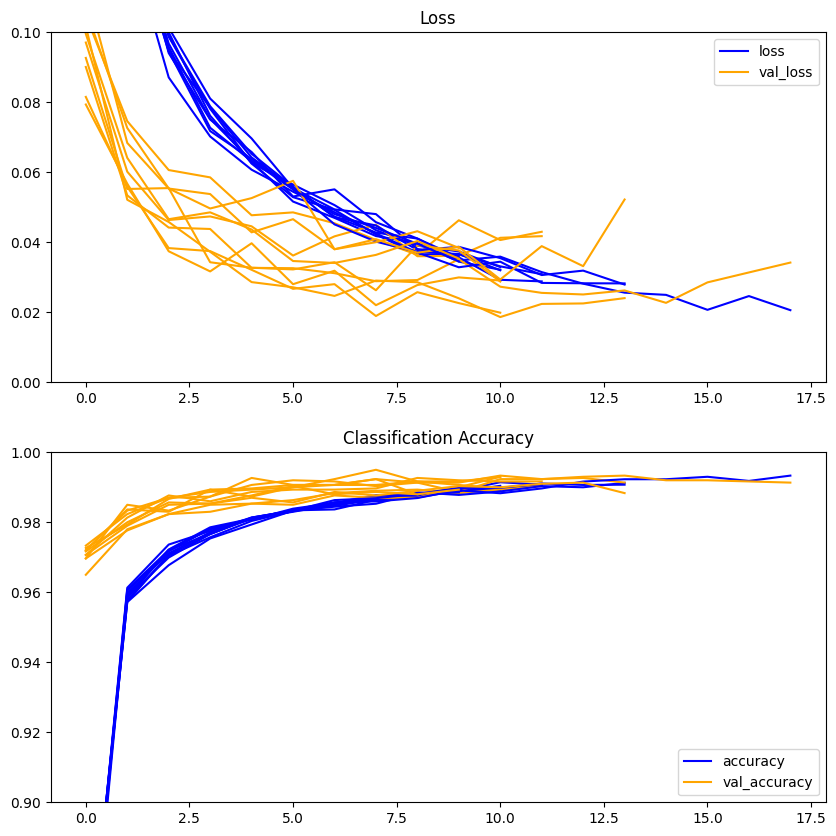

Accuracy: mean=99.080 std=0.146, n=10


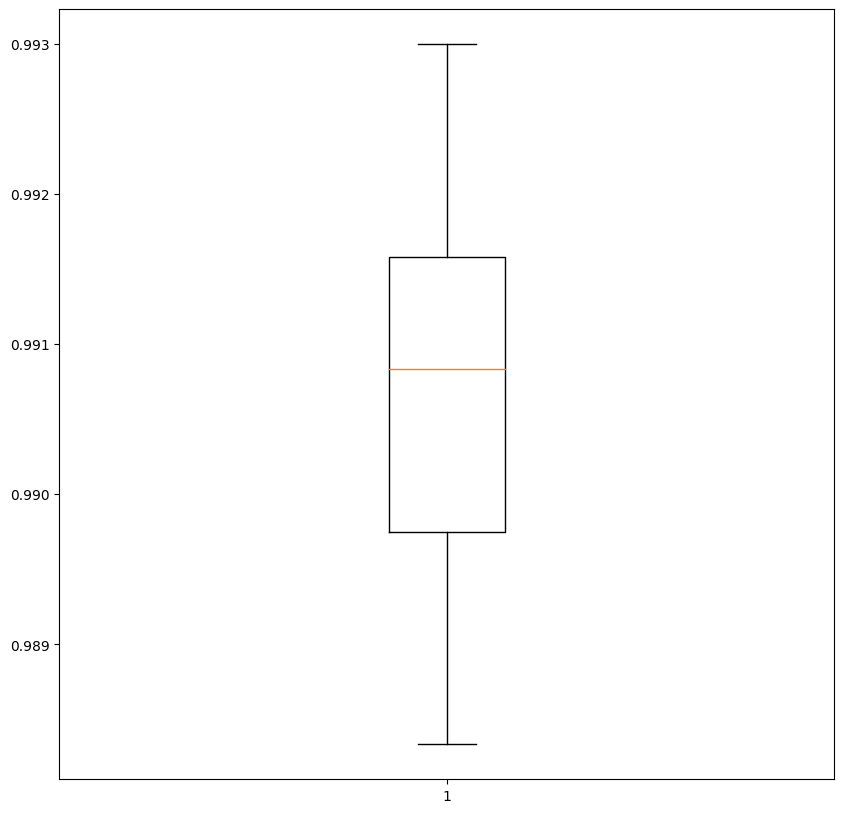

Scores:  [0.9896666407585144, 0.9929999709129333, 0.9903333187103271, 0.9916666746139526, 0.9913333058357239, 0.9913333058357239, 0.9929999709129333, 0.9900000095367432, 0.9883333444595337, 0.9893333315849304]


In [ ]:
# learning curves
summarize_diagnostics(histories)
# summarize estimated performance
summarize_performance(scores)

print("Scores: ",scores)

# **Ensamble of networks**

In [ ]:
results = np.zeros(y_test.shape)
for j in range(len(models)):
    results = results + models[j].predict(x_test)

results = results / len(models)
results = np.argmax(results,axis = 1)
Yresults = np.argmax(y_test,axis = 1)

#print(results.shape)


score = (len(results) - np.count_nonzero(results-Yresults))/len(results)

print("Ensamble test accuracy: ",score*100.,"%")


313/313 [==============================] - 1s 2ms/step
Ensamble test accuracy:  99.48 %


In [ ]:
# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix


#confusion matrix
cm = confusion_matrix(Yresults,results)
print(cm)



[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1133    1    0    0    0    1    0    0    0]
 [   1    0 1029    0    0    0    0    2    0    0]
 [   0    0    1 1005    0    2    0    1    1    0]
 [   0    0    0    0  978    0    0    0    1    3]
 [   0    0    0    5    0  885    1    1    0    0]
 [   4    2    0    0    1    1  949    0    1    0]
 [   0    2    2    0    0    0    0 1023    0    1]
 [   2    0    1    1    0    0    0    0  969    1]
 [   0    0    0    0    5    2    0    3    0  999]]


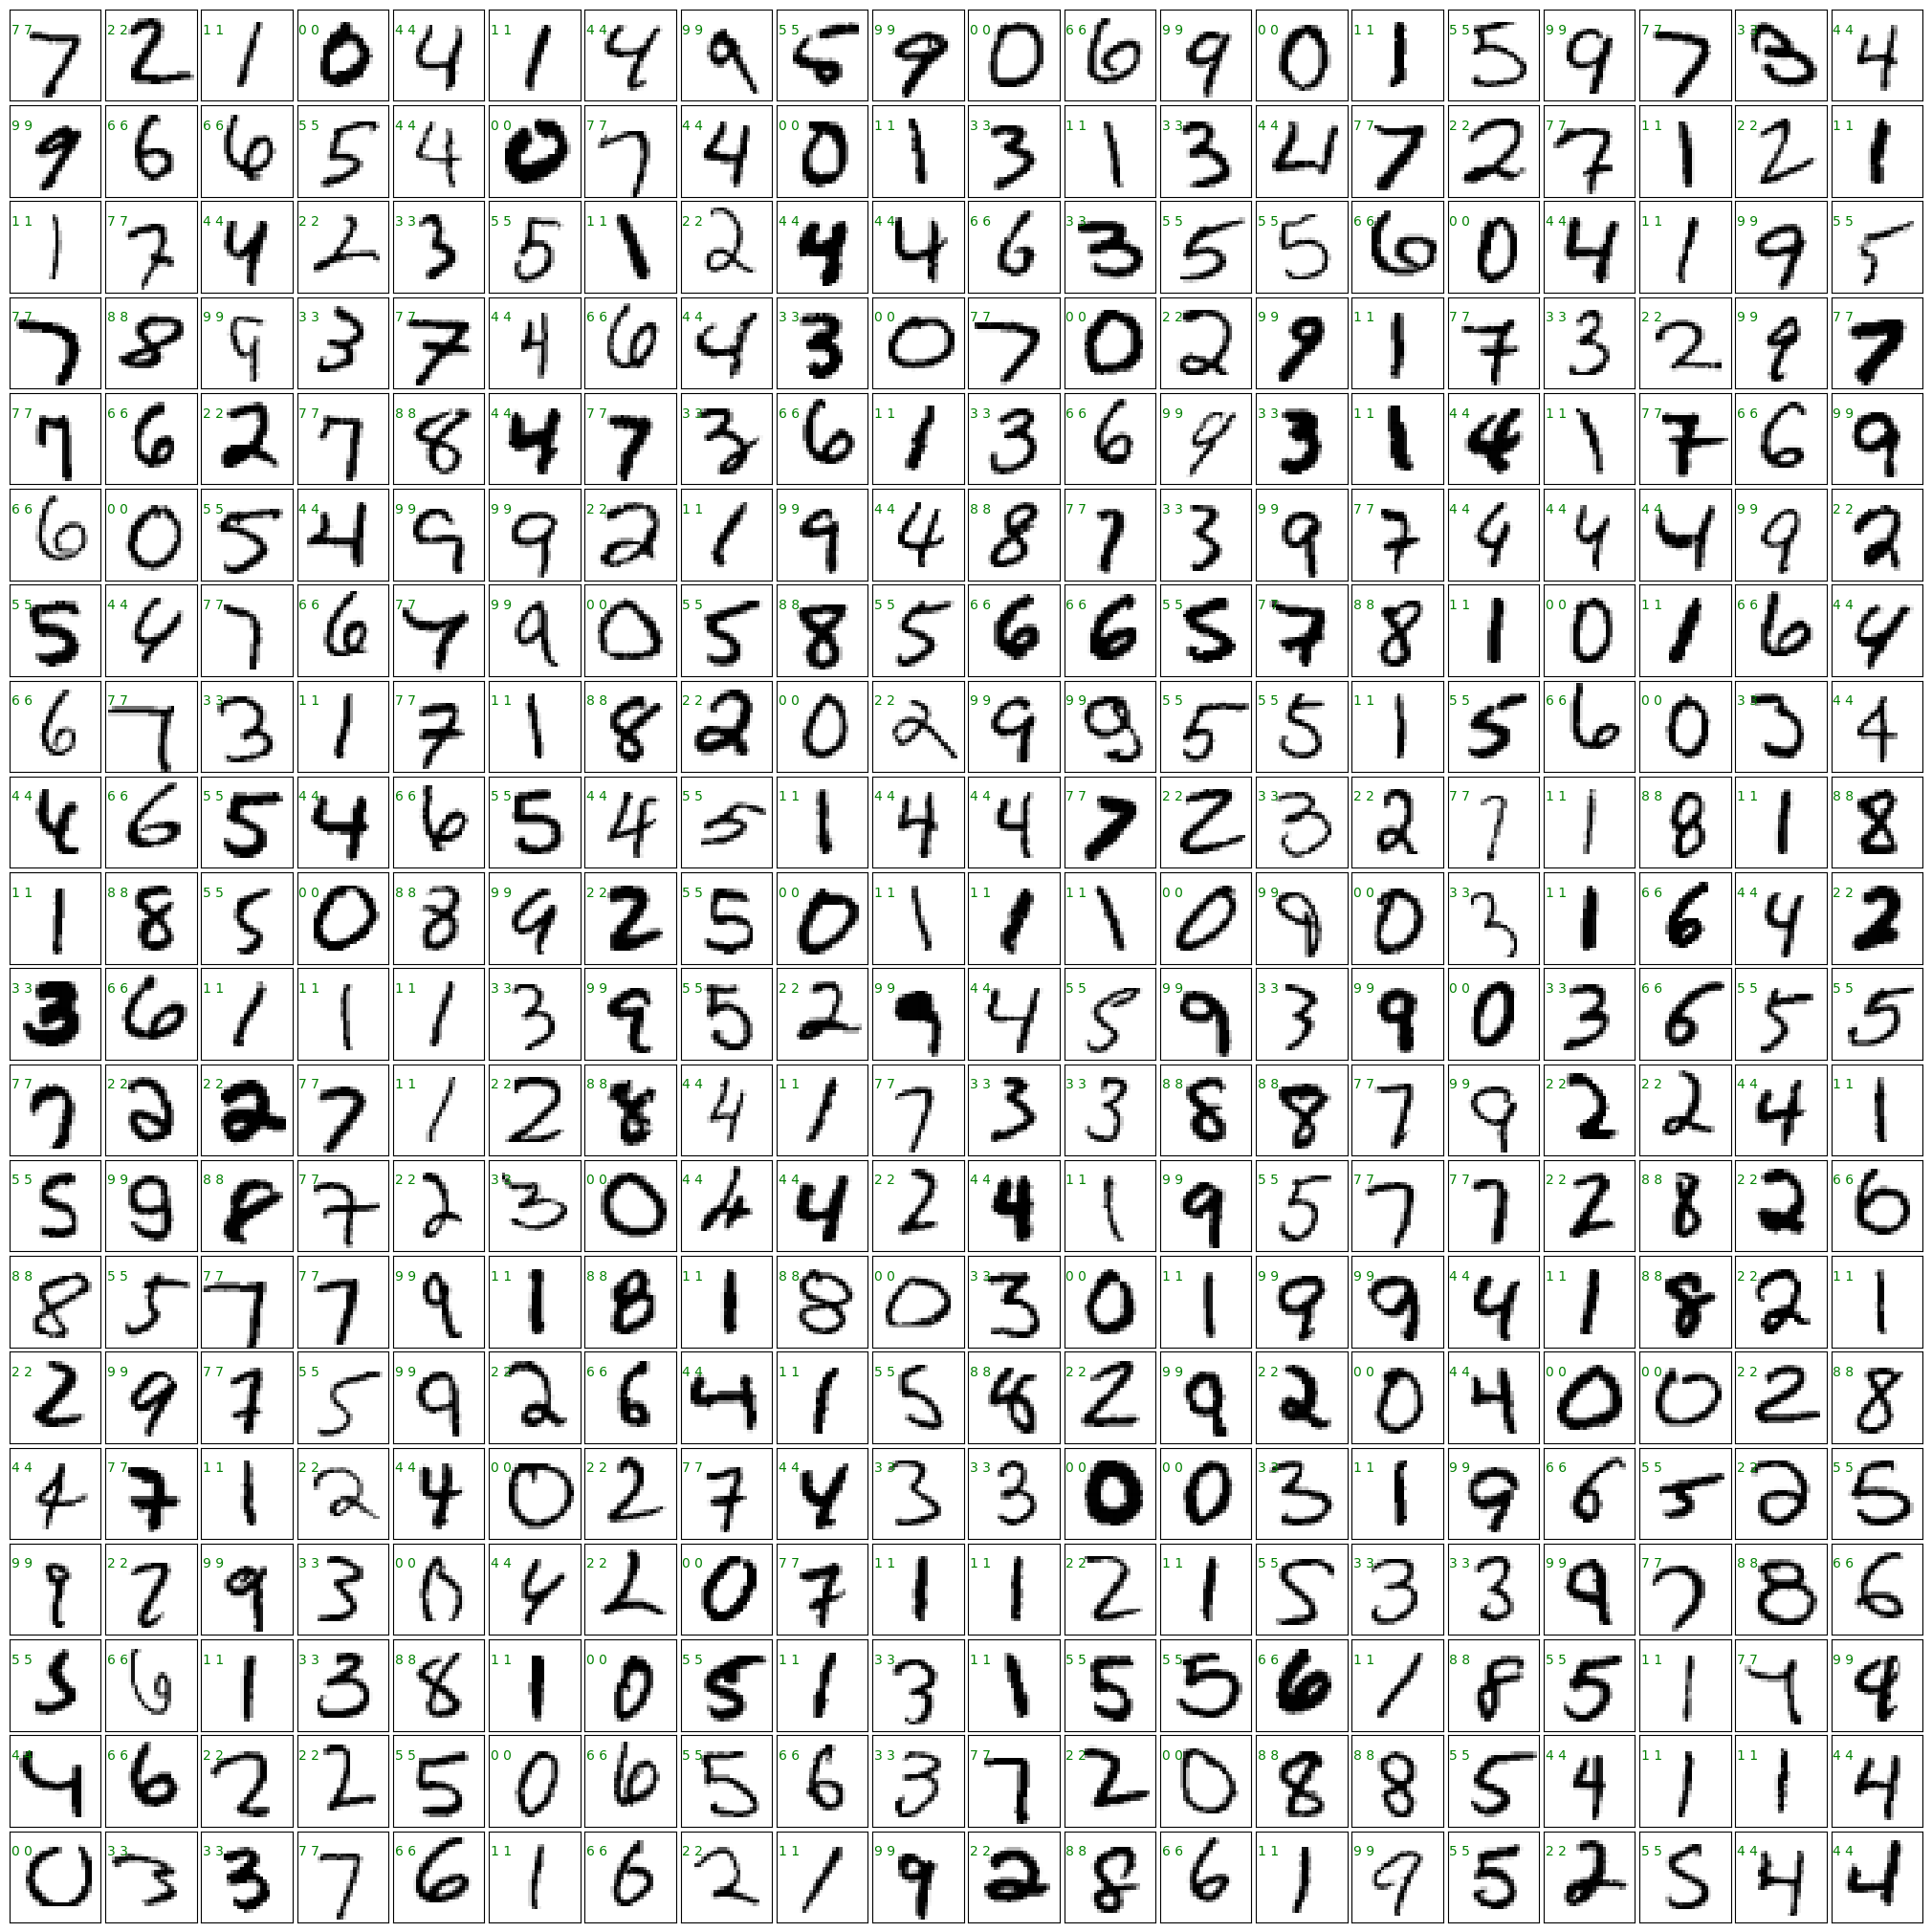

In [ ]:
# use the model to predict the labels of the test data
predicted = results
expected = Yresults

#print(predicted.shape, expected.shape)

# Plot the prediction
fig = plt.figure(figsize=(20, 20))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


# plot the digits: each image is 28x28 pixels
for i in range(400):
    ax = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[i].reshape(img_rows, img_cols), cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    if predicted[i] == expected[i]:
         ax.text(0,7,str(expected[i])+" "+str(predicted[i]), color='green')
    else:
         ax.text(0,7,str(expected[i])+" "+str(predicted[i]), color='red')


#<font color='red'>**Exercise**

* <mark> Build your own convolutional neural network to recognize elements from the "Fashion MNIST" dataset: https://keras.io/api/datasets/fashion_mnist/
* <mark>Implement **augmentation** in this code or **transfer learning** or **cross-validation**.
* A volunteer can present his code.


---

---

---

<center>

#<font color='green'>**Hyperparameter optimization**

</center>

<span style="color:#C9211E">How to </span>  <span style="color:#C9211E"> __optimize the hyperparameters__ </span>  <span style="color:#C9211E"> of the ML algorithm \(number of trees and their depth for BDT\, number of hidden layers\, nodes for Neural Network\)?</span>

* <span style="color:#000000">Nearly each ML method has few hyperparameters \(structure of the Neural Net\, number of trees and their depth for BDT etc\)\.</span>
* <span style="color:#000000">They should be optimized for a given problem\.</span>
* <span style="color:#800000"> __Task: for a given data sample find a set of hyperparameters\, that the estimated error of the given method is minimized\.__ </span>
* <span style="color:#000000">Looks like a typical minimization problem \(fitting like\)\, but:</span>
  * <span style="color:#000000">Getting each measurement is costly</span>
  * <span style="color:#000000">High noise</span>
  * <span style="color:#000000">We can get the value of the minimized function \(so our error\) in the pont </span>  <span style="color:#000000"> __x__ </span>  <span style="color:#000000"> of the hyperparameter space\,  but we can't get the differential easily\.</span>


# **How does it work in practice?**

<span style="color:#000000">Straight line fitting:</span>

$$y(x, w) = w_0+ w_1 x$$

* <span style="color:#000000">Gaussian prior\, no data used</span>

* <span style="color:#000000">First data point\. We find the likelihood based on this point \(left plot\) and multiply: $prior*likelihood$. We get the posterior distribution \(right plot\)\.</span>

* <span style="color:#000000">We add the second point and repeat the procedure\.</span>

* <span style="color:#000000">Adding all the points one by one\.</span>


<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_86.png' width=450px>


---




#<font color='green'>**Optimization of hyperparameters**

* <span style="color:#000000">How to optimize:</span>
  * <span style="color:#000000">**"Grid search”** \- scan over all possible values of parameters\. </span>
  * **"Random search”**
  * <span style="color:#000000">Some type of fitting…</span>
* <span style="color:#000000">Popular method of fitting is the </span>  <span style="color:#000000"> __"bayesian optimization”:__ </span>
  * <span style="color:#000000">Build the probability model</span>
  * <span style="color:#000000">Take „a priori” distributions of parameters</span>
  * <span style="color:#000000">Find\, for which point in the hyperparameter space you can maximally improve your model</span>
  * <span style="color:#000000">Find the value of error</span>
  * <span style="color:#000000">Find the „a posteriori” probability distribution</span>
  * <span style="color:#000000">Repeat</span>


#<font color='green'> **Bayesian optimization**


<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_87.png' width=450px>

<span style="color:#CE181E"> __We are searching for a MAXIMUM__ </span>

Unknown function \(with noise\)\, four observations\.

Where should we do the next costly probing?

*Plots from:
[https://www\.iro\.umontreal\.ca/~bengioy/cifar/NCAP2014\-summerschool/slides/Ryan\_adams\_140814\_bayesopt\_ncap\.pdf](https://www.iro.umontreal.ca/~bengioy/cifar/NCAP2014-summerschool/slides/Ryan_adams_140814_bayesopt_ncap.pdf)*




<span style="color:#800000"> __A posteriori distribution__ </span>

A set of functions

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_88.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_89.png' width=450px>

The a posteriori distribution of possible functions\, those functions could generate the observed data points\.



<span style="color:#800000"> __A posteriori functions  – Gaussian Processes \(GP\)__ </span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_810.png' width=450px>

These functions should be somehow parametrized\, for example they could be Gaussian functions\.

<span style="color:#800000"> __Acquisition function__ </span>

* <span style="color:#000000">Posterior GP \(Gaussian Processes\) give us the mean of GP functions </span>  <span style="color:#000000">μ</span>  <span style="color:#000000">\(x\) and their expected variation</span>  <span style="color:#000000"> </span>  $\sigma^2(x)$.</span>
  * <span style="color:#000000"> __Exploration__ </span>  <span style="color:#000000"> – searching for huge variation</span>
  * <span style="color:#000000"> __Exploitation__ </span>  <span style="color:#000000"> – searching for a smallest/greatest \(depends on sign and convention\) value of mean  </span>  <span style="color:#000000">μ</span>  <span style="color:#000000">\(x\)</span>
* <span style="color:#000000">The acquisition policy has to balance these two approaches</span>

<span style="color:#800000"> __Where to put the next point?__ </span>

<span style="color:#000000">Our next chosen point\( x \) should has high mean \(exploitation\) & high variance \(exploration\)\.</span>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_811.png' width=450px>

<span style="color:#800000"> __We choose next x__ </span>

u\(x\) – acqusition function \(finding maximum\)

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_812.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_813.png' width=450px>

We probe once more and repeat the procedure\.\.\.

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_814.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_815.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_816.png' width=450px>

<img src='https://raw.githubusercontent.com/marcinwolter/Machine-learning-KISD-2022/main/images/lecture8/MachineLearning2020_817.png' width=450px>



* <span style="color:#000000">Bayesian optimization depends on the parameters chosen</span>
* <span style="color:#000000">On the acquisition function</span>
* <span style="color:#000000">On the prior selected\.\.\.\.</span>
* <span style="color:#000000">It’s </span>  <span style="color:#000000"> __sequential\.__ </span>

---




#<font color='green'>**Implementations of hyperparameter tuning**

  * <span style="color:#000000">Tree of Parzen Estimators \(TPE\) used by the HyperOpt package </span>  <span style="color:#B84700">[https://github\.com/hyperopt/hyperopt](https://github.com/hyperopt/hyperopt)</span>  <span style="color:#000000">\)\.</span>
  * <span style="color:#000000">OPTUNA package [https://optuna\.org/](https://optuna.org/) Quite advanced\, grid search\, random sampling\,TPE and Covariance Matrix Adaptation Evolution Strategy CMA\-ES algorithms</span>
  * keras tuner *https://www.tensorflow.org/tutorials/keras/keras_tuner* (RandomSearch,
BayesianOptimization,
Hyperband,
Sklearn Tuner)
  * <span style="color:#000000">Many more packages\.\.\.</span>

---

__Nice OPTUNA vs\. HYPEROPT comparison:__

__[https://neptune\.ai/blog/optuna\-vs\-hyperopt](https://neptune.ai/blog/optuna-vs-hyperopt)__



# **<span style="color:#000000">Simple example with HYPEROPT**




In [ ]:
#Hyperopt demo - minimize x^2 function

from hyperopt import fmin, tpe, rand, hp, STATUS_OK, Trials, plotting
import matplotlib.pyplot as plt

fspace = {
    'x': hp.uniform('x', -5, 5)
}

def f(params):
    x = params['x']
    val = x**2
    return {'loss': val, 'status': STATUS_OK}

trials = Trials()

# possible algos: algo= (tpe.suggest, rand.suggest, )
best = fmin(fn=f, space=fspace, algo=tpe.suggest,  max_evals=1000, trials=trials)
print('best:', best)
print(' trials:')

#for trial in trials.trials[:2]:
#    print(trial)




100%|██████████| 1000/1000 [00:05<00:00, 178.10trial/s, best loss: 5.863109745332551e-08]
best: {'x': 0.00024213859141682787}
 trials:


In [ ]:
#print(trials.trials)

avg best error: 5.863109745332551e-08


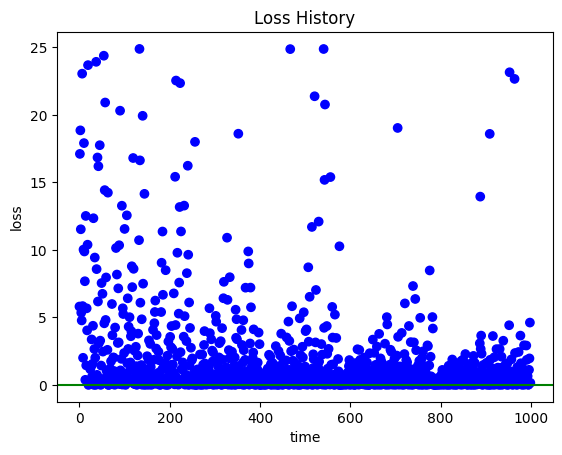

In [ ]:
plotting.main_plot_history(trials)

Showing Histogram of 1000 jobs


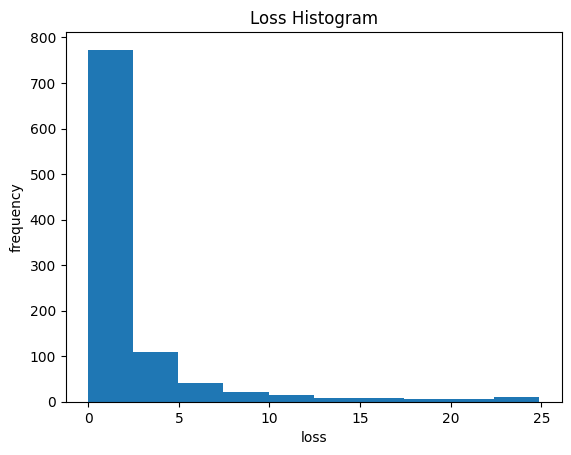

In [ ]:
plotting.main_plot_histogram(trials)

finite loss range 5.863109745332551e-08 24.879977936365414 -0.9999999413689026


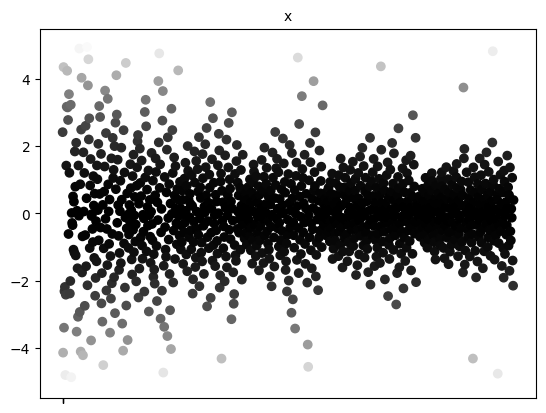

In [ ]:
plotting.main_plot_vars(trials)

Text(0, 0.5, '$x$')

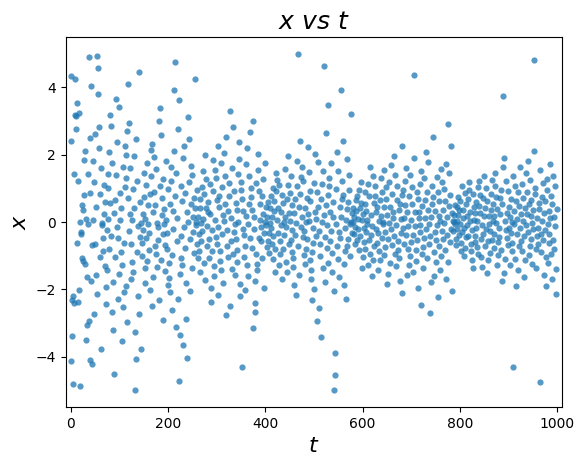

In [ ]:
f, ax = plt.subplots(1)

xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['x'] for t in trials.trials]

ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$x$ $vs$ $t$ ', fontsize=18)
ax.set_xlabel('$t$', fontsize=16)
ax.set_ylabel('$x$', fontsize=16)

Text(0, 0.5, '$val$')

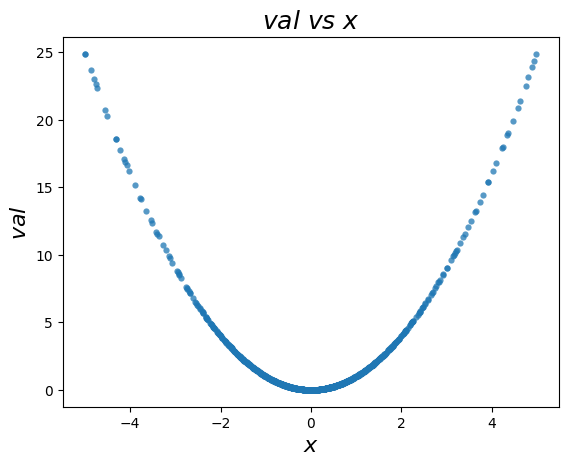

In [ ]:
f, ax = plt.subplots(1)

xs = [t['misc']['vals']['x'] for t in trials.trials]
ys = [t['result']['loss'] for t in trials.trials]

ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$val$ $vs$ $x$ ', fontsize=18)
ax.set_xlabel('$x$', fontsize=16)
ax.set_ylabel('$val$', fontsize=16)

# **Optuna demo**

In [ ]:
# install optuna
! pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 4.6 MB/s eta 0:00:00


In [ ]:

import optuna

def objective(trial):
    x = trial.suggest_uniform('x', -10, 10)
    y = trial.suggest_uniform('y', -10, 10)

    return (x - 2) ** 2 + (y-1) ** 2


study = optuna.create_study(direction='minimize', pruner=optuna.pruners.MedianPruner(), sampler=optuna.samplers.TPESampler() )

study.optimize(objective, n_trials=200)

study.best_params  # E.g. {'x': 2.0912375440412942, 'y': 1.0091490823506173}

[I 2024-04-08 18:58:21,309] A new study created in memory with name: no-name-dae83fe5-4772-4b52-a4a0-92aa38d4fe43
<ipython-input-22-350a60cbbdbd>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  x = trial.suggest_uniform('x', -10, 10)
<ipython-input-22-350a60cbbdbd>:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  y = trial.suggest_uniform('y', -10, 10)
[I 2024-04-08 18:58:21,314] Trial 0 finished with value: 8.931902466005946 and parameters: {'x': -0.9739896209055345, 'y': 1.2954457661773144}. Best is trial 0 with value: 8.931902466005946.
[I 2024-04-08 18:58:21,319] Trial 1 finished with value: 24.3073769631969 and parameters: {'x': 3.212873526168403, 'y': -3.778735687681076}. Best is trial 0 with value

{'x': 1.9609017379298548, 'y': 1.0269261056891053}

## Visualizing the Optimization History

In [ ]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

## Visualizing High-dimensional Parameter Relationships

In [ ]:
from optuna.visualization import plot_parallel_coordinate

plot_parallel_coordinate(study, params=['x', 'y'])

## Visualizing Parameter Relationships

In [ ]:
from optuna.visualization import plot_contour

plot_contour(study)

### Selecting Parameters to Visualize

In [ ]:
plot_contour(study, params=['x', 'y'])

## Visualizing Individual Parameters

In [ ]:
from optuna.visualization import plot_slice

plot_slice(study)

### Selecting Parameters to Visualize

In [ ]:
plot_slice(study, params=['x', 'y'])

## Visualizing Parameter Importances

In [ ]:
from optuna.visualization import plot_param_importances

plot_param_importances(study)

#<font color='green'>**Examples of optimalization of hand written digits classification using hyperopt, optuna and keras tuner**

#<font color='red'>**MNIST hyperopt optimalization**

In [ ]:
'''Trains a simple deep NN on the MNIST dataset.


'''

from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

N_TRAIN_EXAMPLES = 3000
N_TEST_EXAMPLES = 1000

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# print info about a shape of arrays
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')
print(y_train.shape, 'train samples')
print(y_test.shape, 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test  = tf.keras.utils.to_categorical(y_test, num_classes)


# take a subset of all MNIST events
x_train = x_train[:N_TRAIN_EXAMPLES]
y_train = y_train[:N_TRAIN_EXAMPLES]
x_test = x_test[:N_TEST_EXAMPLES]
y_test = y_test[:N_TEST_EXAMPLES]

# print info about a shape of arrays
print(x_train.shape, 'train samples after conversion')
print(x_test.shape, 'test samples  after conversion')
print(y_train.shape, 'train samples after conversion')
print(y_test.shape, 'test samples  after conversion')


(60000, 784) train samples
(10000, 784) test samples
(60000,) train samples
(10000,) test samples
(3000, 784) train samples after conversion
(1000, 784) test samples  after conversion
(3000, 10) train samples after conversion
(1000, 10) test samples  after conversion


In [ ]:
space = {

            'units1': hp.quniform('units1', 32,3*1024,32),
            'dropout1': hp.uniform('dropout1', .00,.50),

        }

In [ ]:
def f_nn(params):

    #print ('Parameters testing: ', params)

    model = Sequential()
    model.add(Dense(int(params['units1']), activation='relu', input_shape=(784,)))
    model.add(Dropout(params['dropout1']))
    model.add(Dense(int(params['units1']), activation='relu'))
    model.add(Dropout(params['dropout1']))
    model.add(Dense(int(params['units1']), activation='relu'))
    model.add(Dropout(params['dropout1']))
    model.add(Dense(num_classes, activation='softmax'))

    #model.summary()

    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0,
                    validation_data=(x_test, y_test))

    score = model.evaluate(x_test, y_test, verbose=0)
    #print('Test accuracy:', score[1])
    # return 'accuracy'
    return {'loss': -score[1], 'status': STATUS_OK}



# **Find the best parameters:**

In [ ]:

trials = Trials()
best = fmin(fn=f_nn, space=space, algo=tpe.suggest, max_evals=50, trials=trials)



100%|██████████| 50/50 [05:05<00:00,  6.12s/trial, best loss: -0.9419999718666077]


In [ ]:
print('best: ', best)
print('best accuracy: ',-trials.best_trial['result']['loss'])

#from hyperopt import space_eval
#print('best parameters: ',space_eval(space, best))

best:  {'dropout1': 0.1799594939302675, 'units1': 672.0}
best accuracy:  0.9419999718666077


# **Visualization**

In [ ]:
print(trials.trials)

[{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': -0.9300000071525574, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'dropout1': [0], 'units1': [0]}, 'vals': {'dropout1': [0.11897416110511694], 'units1': [1056.0]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2024, 4, 8, 18, 58, 33, 99000), 'refresh_time': datetime.datetime(2024, 4, 8, 18, 58, 46, 8000)}, {'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': -0.9350000023841858, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'dropout1': [1], 'units1': [1]}, 'vals': {'dropout1': [0.08247714586472332], 'units1': [2176.0]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2024, 4, 8, 18, 58, 46, 16000), 'refresh_time': datetime.datetime(2024, 4, 8, 18, 58, 55, 271000)}, {'state': 2, 'tid': 2, 'spec': None, 'result': {'loss': -0.92799997329711

avg best error: -0.9419999718666077


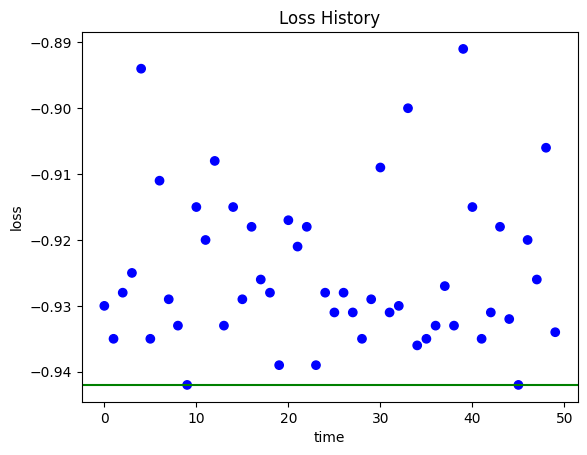

In [ ]:
from hyperopt import plotting

plotting.main_plot_history(trials)

Showing Histogram of 50 jobs


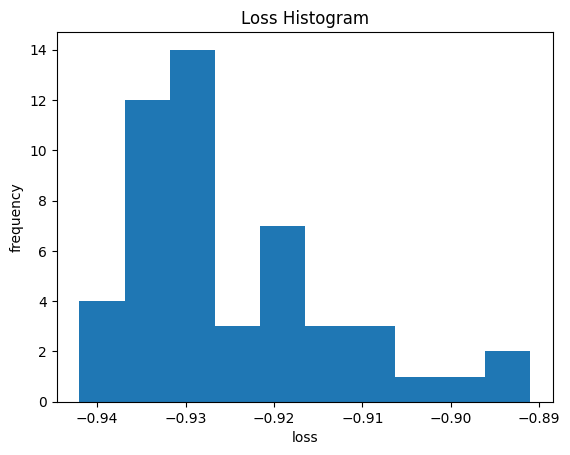

In [ ]:
plotting.main_plot_histogram(trials)

finite loss range -0.9419999718666077 -0.890999972820282 -1.9419999718666077


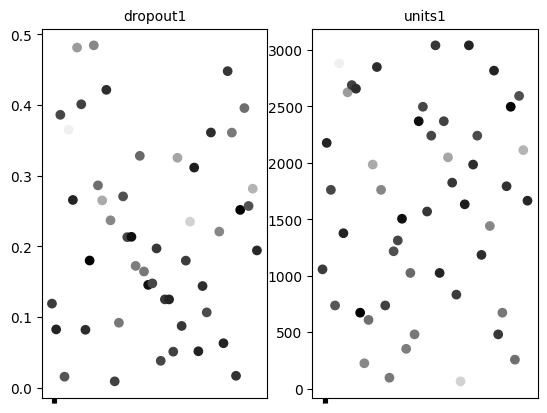

In [ ]:
plotting.main_plot_vars(trials)

Text(0, 0.5, '$units$')

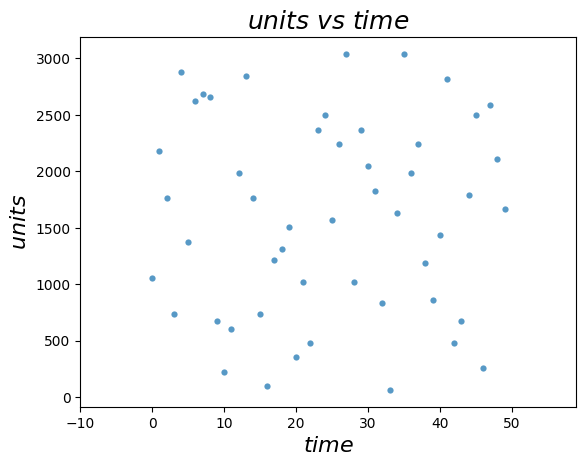

In [ ]:
#units vs time

f, ax = plt.subplots(1)
xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['units1'] for t in trials.trials]
ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$units$ $vs$ $time$ ', fontsize=18)
ax.set_xlabel('$time$', fontsize=16)
ax.set_ylabel('$units$', fontsize=16)

Text(0, 0.5, '$dropout$')

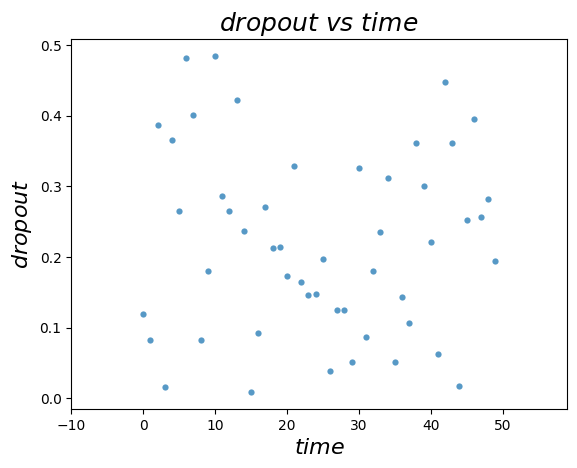

In [ ]:
#units vs time

f, ax = plt.subplots(1)
xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['dropout1'] for t in trials.trials]
ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$dropout$ $vs$ $time$ ', fontsize=18)
ax.set_xlabel('$time$', fontsize=16)
ax.set_ylabel('$dropout$', fontsize=16)

Text(0, 0.5, '$dropout$')

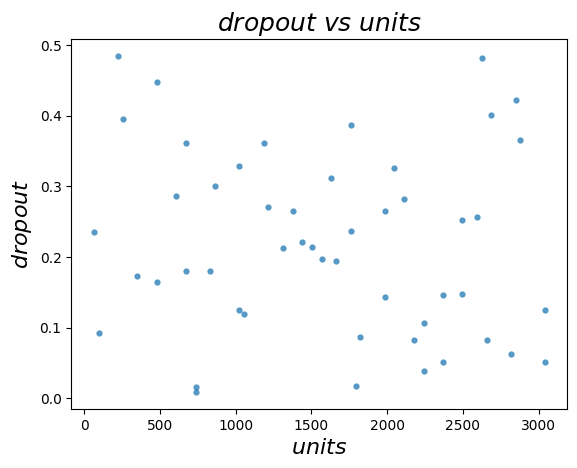

In [ ]:
#dropout vs units

f, ax = plt.subplots(1)
xs = [t['misc']['vals']['units1'] for t in trials.trials]
ys = [t['misc']['vals']['dropout1'] for t in trials.trials]
#ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$dropout$ $vs$ $units$ ', fontsize=18)
ax.set_xlabel('$units$', fontsize=16)
ax.set_ylabel('$dropout$', fontsize=16)

Text(0, 0.5, '$accuracy$')

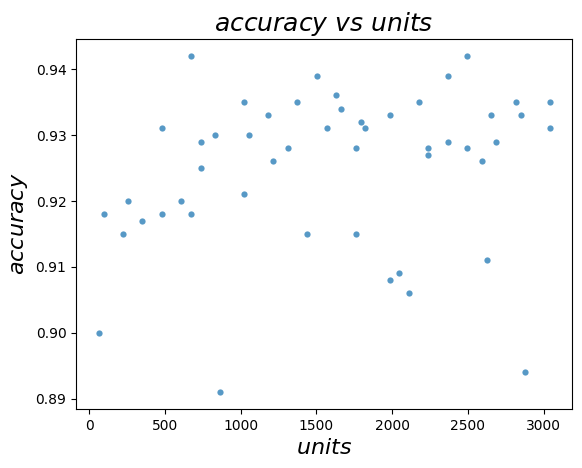

In [ ]:
#value vs units

f, ax = plt.subplots(1)
xs = [t['misc']['vals']['units1'] for t in trials.trials]
ys = [-t['result']['loss'] for t in trials.trials]
#ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$accuracy$ $vs$ $units$ ', fontsize=18)
ax.set_xlabel('$units$', fontsize=16)
ax.set_ylabel('$accuracy$', fontsize=16)



Text(0, 0.5, '$accuracy$')

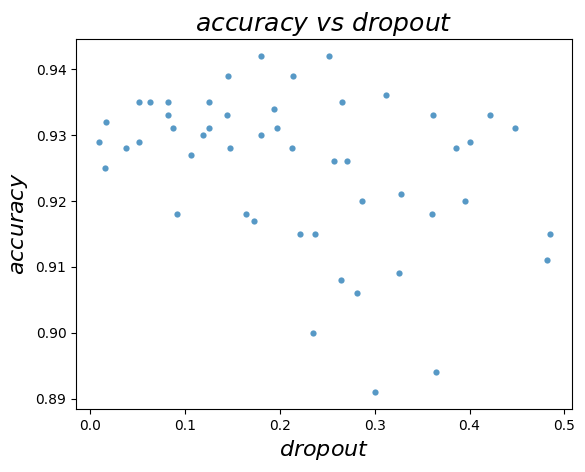

In [ ]:
#value vs dropout

f, ax = plt.subplots(1)
xs = [t['misc']['vals']['dropout1'] for t in trials.trials]
ys = [-t['result']['loss'] for t in trials.trials]
#ax.set_xlim(xs[0]-10, xs[-1]+10)
ax.scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax.set_title('$accuracy$ $vs$ $dropout$ ', fontsize=18)
ax.set_xlabel('$dropout$', fontsize=16)
ax.set_ylabel('$accuracy$', fontsize=16)



#<font color='red'>**Optuna MNIST optimalization**

In [ ]:
"""
Optuna example that optimizes a neural network classifier configuration for the
MNIST dataset using Keras.
In this example, we optimize the validation accuracy of MNIST classification using
Keras. We optimize the filter and kernel size, kernel stride and layer activation.
"""
! pip install optuna

import warnings

from keras.backend import clear_session
from keras.datasets import mnist
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

import optuna

In [ ]:
# Reduce the size of a dataset to speed the training up
N_TRAIN_EXAMPLES = 3000
N_VALID_EXAMPLES = 1000
BATCHSIZE = 128
CLASSES = 10
EPOCHS = 20


In [ ]:


(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

x_train = x_train.reshape(60000, 784)[:N_TRAIN_EXAMPLES].astype("float32") / 255
x_valid = x_valid.reshape(10000, 784)[:N_VALID_EXAMPLES].astype("float32") / 255
y_train = y_train[:N_TRAIN_EXAMPLES]
y_valid = y_valid[:N_VALID_EXAMPLES]

In [ ]:
def objective(trial):

    # Clear clutter from previous Keras session graphs.
    clear_session()

    units = int(trial.suggest_discrete_uniform("units1", 32,3*1024,32))
    dropout = trial.suggest_uniform('dropout1', .00,.50)
    act = trial.suggest_categorical('activation', ['relu','sigmoid','linear'])
    lr = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)

    model = Sequential()
    model.add(Dense(units, activation=act, input_shape=(784,)))
    model.add(Dropout(dropout))
    model.add(Dense(units, activation=act))
    model.add(Dropout(dropout))
    model.add(Dense(units, activation=act))
    model.add(Dropout(dropout))

    model.add(Dense(CLASSES, activation="softmax"))

    # We compile our model with a sampled learning rate.
    model.compile(
        loss="sparse_categorical_crossentropy", optimizer=RMSprop(learning_rate=lr), metrics=["accuracy"]
    )

    model.fit(
        x_train,
        y_train,
        validation_data=(x_valid, y_valid),
        shuffle=True,
        batch_size=BATCHSIZE,
        epochs=epochs,
        verbose=False,
    )

    # Evaluate the model accuracy on the validation set.
    score = model.evaluate(x_valid, y_valid, verbose=0)
    return score[1]


# Find the best parameters

In [ ]:

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)


[I 2024-04-08 19:03:47,228] A new study created in memory with name: no-name-e0734e12-667b-48b4-b7a8-77cf35816256
<ipython-input-47-46a177420aeb>:6: FutureWarning:

suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., step=...) instead.

<ipython-input-47-46a177420aeb>:7: FutureWarning:

suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.

[I 2024-04-08 19:03:55,869] Trial 0 finished with value: 0.10999999940395355 and parameters: {'units1': 1728.0, 'dropout1': 0.37976130378292594, 'activation': 'sigmoid', 'learning_rate': 0.006285951936584406}. Best is trial 0 with value: 0.10999999940395355.
[I 2024-04-08 19:04:07,914] Trial 1 finished with value: 0.7739999890327454 and parameters: {'units1': 576.0, 'dropout1': 0.40966643487889826, 'activation'

In [ ]:

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.9390000104904175
  Params: 
    units1: 1984.0
    dropout1: 0.3285197902794591
    activation: relu
    learning_rate: 0.0015270046826637732


## Visualizing the Optimization History

In [ ]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

## Visualizing High-dimensional Parameter Relationships

In [ ]:
from optuna.visualization import plot_parallel_coordinate

plot_parallel_coordinate(study)

## Visualizing Parameter Relationships

In [ ]:
from optuna.visualization import plot_contour

plot_contour(study)

### Selecting Parameters to Visualize

In [ ]:
plot_contour(study, params=['units1', 'dropout1', 'learning_rate'])

## Visualizing Individual Parameters

In [ ]:
from optuna.visualization import plot_slice

plot_slice(study)

### Selecting Parameters to Visualize

In [ ]:
plot_slice(study, params=['units1', 'dropout1'])

## Visualizing Parameter Importances

In [ ]:
from optuna.visualization import plot_param_importances

plot_param_importances(study)

#<font color='red'>**Keras tuner MNIST optimalization**

In [ ]:
"""
Keras tuner example that optimizes a neural network classifier configuration for the
MNIST dataset using Keras.
"""

! pip install keras_tuner

import warnings

from keras.backend import clear_session
from keras.datasets import mnist
from keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

import keras_tuner as kt

In [ ]:

N_TRAIN_EXAMPLES = 3000
N_VALID_EXAMPLES = 1000
BATCHSIZE = 128
CLASSES = 10
EPOCHS = 20


#**Read MNIST data**

In [ ]:
# Clear clutter from previous Keras session graphs.
clear_session()

(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

x_train = x_train.reshape(60000, 784)[:N_TRAIN_EXAMPLES].astype("float32") / 255
x_valid = x_valid.reshape(10000, 784)[:N_VALID_EXAMPLES].astype("float32") / 255
y_train = y_train[:N_TRAIN_EXAMPLES]
y_valid = y_valid[:N_VALID_EXAMPLES]



#**Build model depending on hyperparameters *kt.HyperParameters()***

In [ ]:
'''
    # This are parameters optimized by optuna, we do the same below
    units = int(trial.suggest_discrete_uniform("units1", 32,1024,1))
    dropout = trial.suggest_uniform('dropout1', .00,.50)
    act = trial.suggest_categorical('activation', ['relu','sigmoid','linear'])
    lr = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
'''

def build_model(hp):

    units=hp.Int("units", min_value=32, max_value=3*1024, step=32)
    dropout=hp.Float('dropout', 0.00, 0.50)
    act=hp.Choice('activation', ['relu','sigmoid','linear'])
    lr = hp.Float("learning_rate", 1e-5, 1e-1, sampling='log')

    model = Sequential()
    model.add(Dense(units=units, activation=act, input_shape=(784,)))
    model.add(Dropout(rate=dropout))
    model.add(Dense(units=units, activation=act))
    model.add(Dropout(rate=dropout))
    model.add(Dense(units=units, activation=act))
    model.add(Dropout(rate=dropout))

    model.add(Dense(CLASSES, activation="softmax"))

    # We compile our model with a sampled learning rate.
    model.compile(
        loss="sparse_categorical_crossentropy", optimizer=RMSprop(learning_rate=lr), metrics=["accuracy"]
    )

    return model

build_model(kt.HyperParameters())



#**Prepare the search space**

In [ ]:
#select a tuner class to run the search. You may choose from RandomSearch, BayesianOptimization
# and Hyperband, which correspond to different tuning algorithms.

tuner = kt.BayesianOptimization(
    hypermodel = build_model,
    objective="val_accuracy",
    max_trials=30
)

tuner.search_space_summary()


Reloading Tuner from ./untitled_project/tuner0.json
Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 3072, 'step': 32, 'sampling': 'linear'}
dropout (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': None, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'linear'], 'ordered': False}
learning_rate (Float)
{'default': 1e-05, 'conditions': [], 'min_value': 1e-05, 'max_value': 0.1, 'step': None, 'sampling': 'log'}


# **Find the best parameters**

In [ ]:
epochs=20
tuner.search(x_train, y_train, epochs=epochs, validation_data=(x_valid, y_valid))



#**Get best model**

In [ ]:
# Get the top 2 models.
models = tuner.get_best_models(num_models=2)
best_model = models[0]
# Build the model.
best_model.build()
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1088)              854080    
                                                                 
 dropout (Dropout)           (None, 1088)              0         
                                                                 
 dense_1 (Dense)             (None, 1088)              1184832   
                                                                 
 dropout_1 (Dropout)         (None, 1088)              0         
                                                                 
 dense_2 (Dense)             (None, 1088)              1184832   
                                                                 
 dropout_2 (Dropout)         (None, 1088)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

# Print a summary of the 10 best search results

In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 16 summary
Hyperparameters:
units: 1088
dropout: 0.3389728596536627
activation: relu
learning_rate: 0.0015571881961581463
Score: 0.9359999895095825

Trial 26 summary
Hyperparameters:
units: 3072
dropout: 0.0
activation: relu
learning_rate: 0.0010363256884900315
Score: 0.9350000023841858

Trial 06 summary
Hyperparameters:
units: 2528
dropout: 0.39092687654757435
activation: relu
learning_rate: 0.0010874629584669442
Score: 0.9340000152587891

Trial 13 summary
Hyperparameters:
units: 1824
dropout: 0.20316942595852583
activation: relu
learning_rate: 0.0012107731214171405
Score: 0.9319999814033508

Trial 28 summary
Hyperparameters:
units: 1408
dropout: 0.5
activation: relu
learning_rate: 0.002705494514675605
Score: 0.9300000071525574

Trial 12 summary
Hyperparameters:
units: 2208
dropout: 0.3608688080618014
activation: relu
learning_rate: 0.0017108921447828854
Score: 0



---



---



---



#<font color='green'>**Summary**

<span style="color:#000000"> __We have learned today how to optimize the hyperparameters\!__ </span>

Very usefull for any training!



#**Bibliography:**

<span style="color:#000000">Brochu\, E\.\, Cora\, V\. M\.\, and De Freitas\, N\. \(2010\)\. A tutorial on bayesian optimization of expensive cost functions\, with application to active user modeling and hierarchical reinforcement learning\. arXiv preprint arXiv:1012\.2599\.</span>

<span style="color:#000000">Shahriari\, B\.\, Swersky\, K\.\, Wang\, Z\.\, Adams\, R\. P\.\, and de Freitas\, N\. \(2016\)\. Taking the human out of the loop: A review of bayesian optimization\. Proceedings of the IEEE\, 104\(1\):148–175\.</span>

<span style="color:#000000">**Nice tutorial:**</span>

<span style="color:#000000">[https://www\.iro\.umontreal\.ca/~bengioy/cifar/NCAP2014\-summerschool/slides/Ryan\_adams\_140814\_bayesopt\_ncap\.pdf](https://www.iro.umontreal.ca/~bengioy/cifar/NCAP2014-summerschool/slides/Ryan_adams_140814_bayesopt_ncap.pdf)</span>


# <font color = green> **Topics we try to cover in the next TWO lectures:**
(but there is a little time...)

* GAN - generative adversary network (maybe short)
* Autoencoders - like PCA but non-linear
* Stable diffusion generation (very popular for image generation)
* Reinforcement learning RL - how to train a robot?



# <font color = green> **Topics we will not cover:**
(because of little time...)

* Cluster analysis,
* Bayesian learning and Mixture Density Networks - a network (or a set of networks) returns probability distribution rather than an output in the form of numbers,
* recurrent networks, long short-term memory LSTM networks,
* language models, ChatGPT,
* and many others.
